In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
from scipy.io.wavfile import write
from random import gauss
from sklearn.model_selection import train_test_split

#for loading, visualizing and playing audio files
import librosa
import librosa.display

In [2]:
yes_data = glob.glob("./yes/*.wav")
no_data = glob.glob("./no/*.wav")
print(len(yes_data),len(no_data))

141 408


In [3]:
# Adding noise to data
i=0
# len(yes_data)
for i in range(len(yes_data)):
    # Loading one file at a time from yes_data
    signal = np.array(scipy.io.wavfile.read(yes_data[i])[1]).astype(np.float32)
    if type(signal[0])!=np.float32:
        continue
    # Augmentnoise to the audio data
    noisy_1 = gauss(0,100)
    noisy_2 = gauss(100,200)
    noisy_3 = gauss(200,300)
    noisy_4 = gauss(300,400)
    noisy_5 = gauss(400,500)
    
    noise_augmented_signal_1 = signal + noisy_1
    scaled = np.int16(noise_augmented_signal_1/np.max(np.abs(noise_augmented_signal_1)) * 32767)
    file_name = './yes_augmented/'+str(i+1)+'_11.wav'
    write(file_name, 44100, scaled)
    file_name = './yes_augmented/'+str(i+1)+'_12.wav'
    x,y=np.split(scaled,2)
    write(file_name, 44100, y+x)
    
    noise_augmented_signal_2 = signal + noisy_2
    scaled = np.int16(noise_augmented_signal_2/np.max(np.abs(noise_augmented_signal_2)) * 32767)
    file_name = './yes_augmented/'+str(i+1)+'_21.wav'
    write(file_name, 44100, scaled)
    file_name = './yes_augmented/'+str(i+1)+'_22.wav'
    x,y=np.split(scaled,2)
    write(file_name, 44100, y+x)
    
    noise_augmented_signal_3 = signal + noisy_3
    scaled = np.int16(noise_augmented_signal_3/np.max(np.abs(noise_augmented_signal_3)) * 32767)
    file_name = './yes_augmented/'+str(i+1)+'_31.wav'
    write(file_name, 44100, scaled)
    file_name = './yes_augmented/'+str(i+1)+'_32.wav'
    x,y=np.split(scaled,2)
    write(file_name, 44100, y+x)
    
    noise_augmented_signal_4 = signal + noisy_4
    scaled = np.int16(noise_augmented_signal_4/np.max(np.abs(noise_augmented_signal_4)) * 32767)
    file_name = './yes_augmented/'+str(i+1)+'_41.wav'
    write(file_name, 44100, scaled)
    file_name = './yes_augmented/'+str(i+1)+'_42.wav'
    x,y=np.split(scaled,2)
    write(file_name, 44100, y+x)
    
    noise_augmented_signal_5 = signal + noisy_5
    scaled = np.int16(noise_augmented_signal_5/np.max(np.abs(noise_augmented_signal_5)) * 32767)
    file_name = './yes_augmented/'+str(i+1)+'_51.wav'
    write(file_name, 44100, scaled)
    file_name = './yes_augmented/'+str(i+1)+'_52.wav'
    x,y=np.split(scaled,2)
    write(file_name, 44100, y+x)
    
    # print(str(i+1)+' "'+yes_data[i]+'"',"augmented with noise")

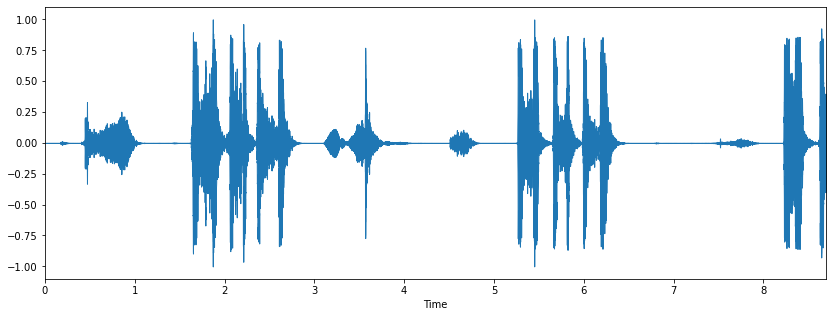

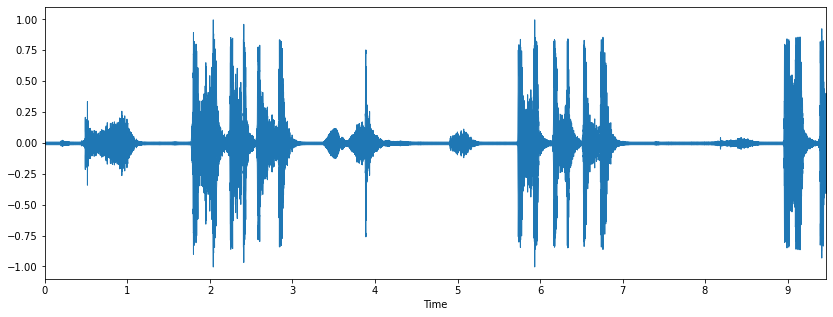

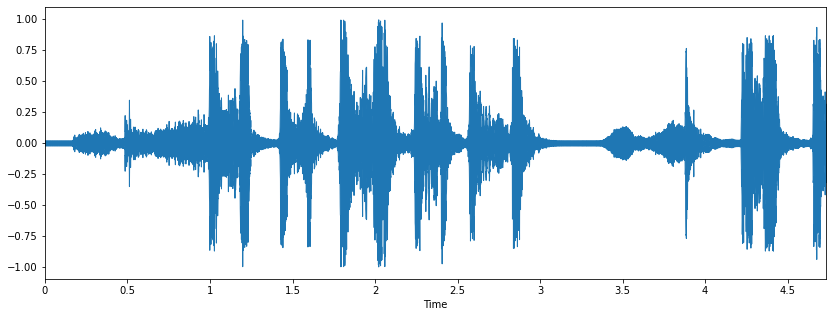

In [4]:
signal = scipy.io.wavfile.read(yes_data[0])[1].astype(np.float32)
x, sr = librosa.load(yes_data[0], sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

file_name = './yes_augmented/1_41.wav'
x, sr = librosa.load(file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

file_name = './yes_augmented/1_42.wav'
x, sr = librosa.load(file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [5]:
all_yes_data = yes_data+glob.glob("./yes_augmented/*.wav")
all_no_data = no_data

In [6]:
print(len(all_yes_data), len(all_no_data))

451 408


In [7]:
sequence_yes = []
sequence_no = []
num = 1
for i in all_yes_data:
    data = scipy.io.wavfile.read(i)[1].astype(np.float32)
    if type(data[1])!=np.float32:
        continue
    noise_augmented_data = data + gauss(100,200)
    scaled = np.int16(noise_augmented_data/np.max(np.abs(noise_augmented_data)) * 32767)
    file_name = './yes_augmented_clean/'+str(num)+'_1.wav'
    write(file_name, 44100, scaled)
    sequence_yes.append(np.array(data.astype(np.float32)))
    file_name = './yes_augmented_clean/'+str(num)+'_2.wav'
    x,y=np.split(scaled,2)
    write(file_name, 44100, y+x)
    sequence_yes.append(scipy.io.wavfile.read(file_name)[1].astype(np.float32))
    num += 1

num = 1
for i in all_no_data:
    data = scipy.io.wavfile.read(i)[1].astype(np.float32)
    if type(data[1])!=np.float32:
        continue
    noise_augmented_data = data + gauss(100,200)
    scaled = np.int16(noise_augmented_data/np.max(np.abs(noise_augmented_data)) * 32767)
    file_name = './no_augmented_clean/'+str(num)+'_1.wav'
    write(file_name, 44100, scaled)
    sequence_no.append(np.array(data.astype(np.float32)))
    file_name = './no_augmented_clean/'+str(num)+'_2.wav'
    x,y=np.split(scaled,2)
    write(file_name, 44100, y+x)
    sequence_no.append(scipy.io.wavfile.read(file_name)[1].astype(np.float32))
    num += 1

In [8]:
sequence_yes = np.array(sequence_yes)
sequence_no = np.array(sequence_no)
print(len(sequence_yes), len(sequence_no))

682 524


In [9]:
## Gathering all the wav files

features = []
labels = []
labels1=["yes","no"]
for label in labels1:
    a = glob.glob("./"+label+"_augmented_clean/*.wav")
    for i in range(len(a)):
        s , sr = librosa.core.load(a[i])
        features.append(s)
        labels.append(label)
        # print(i,a[i])

0 ./yes_augmented_clean\100_1.wav
1 ./yes_augmented_clean\100_2.wav
2 ./yes_augmented_clean\101_1.wav
3 ./yes_augmented_clean\101_2.wav
4 ./yes_augmented_clean\102_1.wav
5 ./yes_augmented_clean\102_2.wav
6 ./yes_augmented_clean\103_1.wav
7 ./yes_augmented_clean\103_2.wav
8 ./yes_augmented_clean\104_1.wav
9 ./yes_augmented_clean\104_2.wav
10 ./yes_augmented_clean\105_1.wav
11 ./yes_augmented_clean\105_2.wav
12 ./yes_augmented_clean\106_1.wav
13 ./yes_augmented_clean\106_2.wav
14 ./yes_augmented_clean\107_1.wav
15 ./yes_augmented_clean\107_2.wav
16 ./yes_augmented_clean\108_1.wav
17 ./yes_augmented_clean\108_2.wav
18 ./yes_augmented_clean\109_1.wav
19 ./yes_augmented_clean\109_2.wav
20 ./yes_augmented_clean\10_1.wav
21 ./yes_augmented_clean\10_2.wav
22 ./yes_augmented_clean\110_1.wav
23 ./yes_augmented_clean\110_2.wav
24 ./yes_augmented_clean\111_1.wav
25 ./yes_augmented_clean\111_2.wav
26 ./yes_augmented_clean\112_1.wav
27 ./yes_augmented_clean\112_2.wav
28 ./yes_augmented_clean\113_1.w

232 ./yes_augmented_clean\205_1.wav
233 ./yes_augmented_clean\205_2.wav
234 ./yes_augmented_clean\206_1.wav
235 ./yes_augmented_clean\206_2.wav
236 ./yes_augmented_clean\207_1.wav
237 ./yes_augmented_clean\207_2.wav
238 ./yes_augmented_clean\208_1.wav
239 ./yes_augmented_clean\208_2.wav
240 ./yes_augmented_clean\209_1.wav
241 ./yes_augmented_clean\209_2.wav
242 ./yes_augmented_clean\20_1.wav
243 ./yes_augmented_clean\20_2.wav
244 ./yes_augmented_clean\210_1.wav
245 ./yes_augmented_clean\210_2.wav
246 ./yes_augmented_clean\211_1.wav
247 ./yes_augmented_clean\211_2.wav
248 ./yes_augmented_clean\212_1.wav
249 ./yes_augmented_clean\212_2.wav
250 ./yes_augmented_clean\213_1.wav
251 ./yes_augmented_clean\213_2.wav
252 ./yes_augmented_clean\214_1.wav
253 ./yes_augmented_clean\214_2.wav
254 ./yes_augmented_clean\215_1.wav
255 ./yes_augmented_clean\215_2.wav
256 ./yes_augmented_clean\216_1.wav
257 ./yes_augmented_clean\216_2.wav
258 ./yes_augmented_clean\217_1.wav
259 ./yes_augmented_clean\217_

461 ./yes_augmented_clean\308_2.wav
462 ./yes_augmented_clean\309_1.wav
463 ./yes_augmented_clean\309_2.wav
464 ./yes_augmented_clean\30_1.wav
465 ./yes_augmented_clean\30_2.wav
466 ./yes_augmented_clean\310_1.wav
467 ./yes_augmented_clean\310_2.wav
468 ./yes_augmented_clean\311_1.wav
469 ./yes_augmented_clean\311_2.wav
470 ./yes_augmented_clean\312_1.wav
471 ./yes_augmented_clean\312_2.wav
472 ./yes_augmented_clean\313_1.wav
473 ./yes_augmented_clean\313_2.wav
474 ./yes_augmented_clean\314_1.wav
475 ./yes_augmented_clean\314_2.wav
476 ./yes_augmented_clean\315_1.wav
477 ./yes_augmented_clean\315_2.wav
478 ./yes_augmented_clean\316_1.wav
479 ./yes_augmented_clean\316_2.wav
480 ./yes_augmented_clean\317_1.wav
481 ./yes_augmented_clean\317_2.wav
482 ./yes_augmented_clean\318_1.wav
483 ./yes_augmented_clean\318_2.wav
484 ./yes_augmented_clean\319_1.wav
485 ./yes_augmented_clean\319_2.wav
486 ./yes_augmented_clean\31_1.wav
487 ./yes_augmented_clean\31_2.wav
488 ./yes_augmented_clean\320_1.

14 ./no_augmented_clean\107_1.wav
15 ./no_augmented_clean\107_2.wav
16 ./no_augmented_clean\108_1.wav
17 ./no_augmented_clean\108_2.wav
18 ./no_augmented_clean\109_1.wav
19 ./no_augmented_clean\109_2.wav
20 ./no_augmented_clean\10_1.wav
21 ./no_augmented_clean\10_2.wav
22 ./no_augmented_clean\110_1.wav
23 ./no_augmented_clean\110_2.wav
24 ./no_augmented_clean\111_1.wav
25 ./no_augmented_clean\111_2.wav
26 ./no_augmented_clean\112_1.wav
27 ./no_augmented_clean\112_2.wav
28 ./no_augmented_clean\113_1.wav
29 ./no_augmented_clean\113_2.wav
30 ./no_augmented_clean\114_1.wav
31 ./no_augmented_clean\114_2.wav
32 ./no_augmented_clean\115_1.wav
33 ./no_augmented_clean\115_2.wav
34 ./no_augmented_clean\116_1.wav
35 ./no_augmented_clean\116_2.wav
36 ./no_augmented_clean\117_1.wav
37 ./no_augmented_clean\117_2.wav
38 ./no_augmented_clean\118_1.wav
39 ./no_augmented_clean\118_2.wav
40 ./no_augmented_clean\119_1.wav
41 ./no_augmented_clean\119_2.wav
42 ./no_augmented_clean\11_1.wav
43 ./no_augmented

253 ./no_augmented_clean\214_2.wav
254 ./no_augmented_clean\215_1.wav
255 ./no_augmented_clean\215_2.wav
256 ./no_augmented_clean\216_1.wav
257 ./no_augmented_clean\216_2.wav
258 ./no_augmented_clean\217_1.wav
259 ./no_augmented_clean\217_2.wav
260 ./no_augmented_clean\218_1.wav
261 ./no_augmented_clean\218_2.wav
262 ./no_augmented_clean\219_1.wav
263 ./no_augmented_clean\219_2.wav
264 ./no_augmented_clean\21_1.wav
265 ./no_augmented_clean\21_2.wav
266 ./no_augmented_clean\220_1.wav
267 ./no_augmented_clean\220_2.wav
268 ./no_augmented_clean\221_1.wav
269 ./no_augmented_clean\221_2.wav
270 ./no_augmented_clean\222_1.wav
271 ./no_augmented_clean\222_2.wav
272 ./no_augmented_clean\223_1.wav
273 ./no_augmented_clean\223_2.wav
274 ./no_augmented_clean\224_1.wav
275 ./no_augmented_clean\224_2.wav
276 ./no_augmented_clean\225_1.wav
277 ./no_augmented_clean\225_2.wav
278 ./no_augmented_clean\226_1.wav
279 ./no_augmented_clean\226_2.wav
280 ./no_augmented_clean\227_1.wav
281 ./no_augmented_cle

493 ./no_augmented_clean\86_2.wav
494 ./no_augmented_clean\87_1.wav
495 ./no_augmented_clean\87_2.wav
496 ./no_augmented_clean\88_1.wav
497 ./no_augmented_clean\88_2.wav
498 ./no_augmented_clean\89_1.wav
499 ./no_augmented_clean\89_2.wav
500 ./no_augmented_clean\8_1.wav
501 ./no_augmented_clean\8_2.wav
502 ./no_augmented_clean\90_1.wav
503 ./no_augmented_clean\90_2.wav
504 ./no_augmented_clean\91_1.wav
505 ./no_augmented_clean\91_2.wav
506 ./no_augmented_clean\92_1.wav
507 ./no_augmented_clean\92_2.wav
508 ./no_augmented_clean\93_1.wav
509 ./no_augmented_clean\93_2.wav
510 ./no_augmented_clean\94_1.wav
511 ./no_augmented_clean\94_2.wav
512 ./no_augmented_clean\95_1.wav
513 ./no_augmented_clean\95_2.wav
514 ./no_augmented_clean\96_1.wav
515 ./no_augmented_clean\96_2.wav
516 ./no_augmented_clean\97_1.wav
517 ./no_augmented_clean\97_2.wav
518 ./no_augmented_clean\98_1.wav
519 ./no_augmented_clean\98_2.wav
520 ./no_augmented_clean\99_1.wav
521 ./no_augmented_clean\99_2.wav
522 ./no_augment

In [10]:
## Some utility functions for augmenting dataset

def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

In [11]:
## For extracting MFCC features

def extract_features(data):
    
    result = np.array([])
    
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    # Calculate delta and delta2 MFCCs
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    # Comprehensive MFCCs for better feature extraction
    comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
    mfccs_processed = np.mean(comprehensive_mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

In [12]:
## Get all the mfcc features as well as augmented data

def get_features(data):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    #data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [13]:
## Converting wav files to their features in a list named features

sample_rate = 22050
features1 = []
for i in range(len(features)):
    features1.append(get_features(features[i]))
    # print(i, features1[i])

0 [[-3.57493134e+02  7.41516342e+01 -1.43711605e+01 ... -6.08467078e-03
  -3.75359296e-03 -2.71009910e-03]
 [-2.27066526e+02  3.84403798e+01 -2.18105597e+00 ... -5.19250441e-03
  -9.01846051e-04 -7.63659145e-03]
 [-3.80854462e+02  7.03348312e+01 -1.33949909e+01 ... -3.31265456e-03
  -5.34503371e-04 -2.28637690e-03]
 ...
 [-3.81094055e+02  6.93088531e+01 -1.32177906e+01 ...  8.09516932e-04
   2.31560739e-03 -5.34406956e-03]
 [-3.88103027e+02  7.63484344e+01 -1.58029127e+01 ... -1.59376825e-03
   2.77822954e-03  5.33893146e-03]
 [-3.88103027e+02  7.63484344e+01 -1.58029127e+01 ... -1.59376825e-03
   2.77822954e-03  5.33893146e-03]]
1 [[-2.09518356e+02  1.23837296e+02 -2.82071152e+01 ...  6.30739424e-03
  -1.42841588e-03  5.63244615e-03]
 [-1.05284898e+02  5.50684362e+01 -7.96792607e-01 ...  1.04325906e-02
   1.31062400e-04  8.05209041e-03]
 [-2.38992477e+02  1.19950974e+02 -2.59086628e+01 ...  1.29360706e-02
   5.78065030e-03  2.33937241e-03]
 ...
 [-2.35553604e+02  1.18878548e+02 -2.763

14 [[-3.19084167e+02  8.09061584e+01 -9.09522915e+00 ... -6.04937114e-02
  -9.93607566e-02 -7.63645098e-02]
 [-7.59566325e+01  2.32421227e+01  9.26487705e+00 ...  4.31187001e-03
  -3.65063947e-02  9.46934241e-04]
 [-3.35782806e+02  7.58782654e+01 -6.14164686e+00 ... -6.81576878e-02
  -4.40778770e-02 -1.91872697e-02]
 ...
 [-3.34722046e+02  7.92448502e+01 -7.50436211e+00 ... -5.14046140e-02
  -1.50345601e-02  3.72803546e-02]
 [-3.22956604e+02  7.98713379e+01 -6.78582621e+00 ... -5.76480478e-02
  -8.58585164e-02 -9.38819125e-02]
 [-3.22956604e+02  7.98713379e+01 -6.78582621e+00 ... -5.76480478e-02
  -8.58585164e-02 -9.38819125e-02]]
15 [[-2.59799377e+02  8.41266403e+01 -1.05047359e+01 ...  4.88905385e-02
  -6.13569058e-02 -5.08657880e-02]
 [-8.18678068e+01  2.95190189e+01  8.85661861e+00 ...  8.42121439e-02
   1.87709826e-02 -4.08962675e-02]
 [-2.81248108e+02  7.79396820e+01 -7.26745892e+00 ...  1.25343576e-02
  -4.62544672e-02 -5.35973273e-02]
 ...
 [-2.78893829e+02  8.33454895e+01 -1.0

27 [[-2.02362350e+02  1.12643806e+02 -6.10843658e+01 ...  2.83969636e-03
  -2.00750455e-02 -3.54223792e-03]
 [-7.47876339e+01  4.29319359e+01 -2.17708272e+01 ...  1.16207579e-03
  -3.75906082e-04 -1.79092084e-02]
 [-2.32343109e+02  1.24749931e+02 -6.90693054e+01 ...  7.34003680e-03
  -7.89740961e-03 -1.06505444e-02]
 ...
 [-2.02596497e+02  1.07450645e+02 -5.85023766e+01 ... -3.74740772e-02
  -1.21271675e-02  5.40049747e-03]
 [-2.02263550e+02  1.22520035e+02 -6.54324951e+01 ... -2.51277052e-02
  -3.01519744e-02 -2.56453641e-02]
 [-2.02263550e+02  1.22520035e+02 -6.54324951e+01 ... -2.51277052e-02
  -3.01519744e-02 -2.56453641e-02]]
28 [[-2.03953491e+02  1.11799789e+02 -6.35810013e+01 ...  1.29869254e-03
  -1.99178718e-02 -2.89508584e-03]
 [-1.01402972e+02  5.25538022e+01 -2.84298995e+01 ... -1.77618997e-02
  -1.56377471e-02 -5.27323422e-03]
 [-2.33760498e+02  1.24201141e+02 -7.18918381e+01 ...  4.62095067e-03
  -1.90945119e-02 -1.43796634e-02]
 ...
 [-2.04746033e+02  1.06492828e+02 -6.1

40 [[-2.02382645e+02  1.14352615e+02 -5.73089561e+01 ...  2.57803639e-03
  -2.09572781e-02 -3.16895405e-03]
 [-8.72294108e+01  5.00184151e+01 -2.15933971e+01 ... -1.82991373e-03
  -8.19412875e-03 -9.38248236e-03]
 [-2.31117783e+02  1.25785995e+02 -6.37337837e+01 ...  1.03932135e-02
  -5.47125097e-03 -1.08832875e-02]
 ...
 [-2.02254944e+02  1.08838585e+02 -5.42656212e+01 ... -3.56385373e-02
  -1.25173107e-02  5.20515302e-03]
 [-2.01847702e+02  1.23611832e+02 -6.08551979e+01 ... -2.17351634e-02
  -1.96369831e-02 -1.44537399e-02]
 [-2.01847702e+02  1.23611832e+02 -6.08551979e+01 ... -2.17351634e-02
  -1.96369831e-02 -1.44537399e-02]]
41 [[-7.90652618e+01  8.78200760e+01 -3.14007587e+01 ... -3.52874324e-02
  -4.96893823e-02 -3.42183858e-02]
 [-2.71555257e+01  5.44887993e+01 -1.30947291e+01 ...  3.56587617e-03
  -5.35181981e-02 -3.71456239e-02]
 [-9.39553375e+01  8.16617584e+01 -2.63026581e+01 ... -2.29318421e-02
  -3.00582815e-02 -4.47144546e-02]
 ...
 [-8.44756851e+01  7.98725357e+01 -2.5

53 [[-3.15988861e+02  1.00964722e+02 -3.83043976e+01 ... -1.01832496e-02
  -1.96466576e-02 -3.65895103e-03]
 [-1.13227996e+02  3.62781846e+01 -8.64172162e+00 ... -1.41409518e-02
  -1.68420839e-02 -4.07653692e-03]
 [-3.47310974e+02  1.00646584e+02 -3.97582092e+01 ... -1.51233068e-02
  -1.62934791e-02 -1.15431063e-02]
 ...
 [-3.58981232e+02  1.08777351e+02 -4.63879318e+01 ... -1.82698965e-02
   4.06685239e-03 -1.05935137e-03]
 [-3.37275024e+02  1.02977341e+02 -4.06831131e+01 ...  1.32556830e-03
  -1.16088176e-02 -5.91486925e-03]
 [-3.37275024e+02  1.02977341e+02 -4.06831131e+01 ...  1.32556830e-03
  -1.16088176e-02 -5.91486925e-03]]
54 [[-3.14026245e+02  1.02446365e+02 -3.69273682e+01 ... -1.12717124e-02
  -2.08738539e-02 -4.68140235e-03]
 [-1.07346972e+02  3.62126444e+01 -7.56617617e+00 ... -1.21153575e-02
  -1.59261484e-02 -1.00006185e-02]
 [-3.44201385e+02  1.02211449e+02 -3.76628761e+01 ... -1.80169120e-02
  -1.47183109e-02 -8.57799407e-03]
 ...
 [-3.56825409e+02  1.10930771e+02 -4.4

66 [[-4.07176514e+02  5.45492020e+01 -1.70802097e+01 ...  5.23797818e-04
   8.16875487e-04  9.87192267e-04]
 [-1.46654352e+02  1.63653000e+01 -4.20234479e+00 ...  4.03557230e-03
   6.25003970e-03  4.06465763e-03]
 [-4.18724091e+02  5.05116272e+01 -1.60881596e+01 ... -6.05427136e-04
   8.48152777e-05  6.42980100e-04]
 ...
 [-4.27938751e+02  5.18856354e+01 -1.78708439e+01 ...  1.80800213e-03
   2.06569047e-03  1.72342418e-03]
 [-4.59537476e+02  6.22639313e+01 -1.99137039e+01 ...  2.68614572e-03
   1.28408254e-03 -2.87868985e-04]
 [-4.59537476e+02  6.22639313e+01 -1.99137039e+01 ...  2.68614572e-03
   1.28408254e-03 -2.87868985e-04]]
67 [[-3.15248505e+02  1.01808083e+02 -3.74133186e+01 ... -1.06855491e-02
  -2.01452263e-02 -4.09844052e-03]
 [-6.92520609e+01  2.79291665e+01 -5.89010988e+00 ... -8.40068027e-03
  -1.42334385e-02 -1.36844059e-02]
 [-3.48893188e+02  1.03587830e+02 -3.91201286e+01 ... -1.21690221e-02
  -1.63717140e-02 -9.95370653e-03]
 ...
 [-3.57817505e+02  1.09839584e+02 -4.5

79 [[-2.56476166e+02  1.43232132e+02 -3.58695793e+01 ... -1.27628082e-02
   2.33503315e-03 -8.56469851e-03]
 [-1.53962682e+02  7.54240821e+01 -8.09930120e+00 ... -1.20943774e-03
   1.94614874e-02  7.26447648e-03]
 [-2.79153931e+02  1.39309799e+02 -3.48594704e+01 ...  1.42801590e-02
   7.92755280e-03  1.39126908e-02]
 ...
 [-2.76196075e+02  1.43849670e+02 -4.22887268e+01 ... -1.14393281e-02
  -3.31904106e-02 -4.81812246e-02]
 [-2.77019043e+02  1.51850952e+02 -3.98130913e+01 ... -3.21544558e-02
   3.53339237e-06  1.40986394e-03]
 [-2.77019043e+02  1.51850952e+02 -3.98130913e+01 ... -3.21544558e-02
   3.53339237e-06  1.40986394e-03]]
80 [[-2.59383606e+02  1.41428558e+02 -3.88180428e+01 ... -8.66840407e-03
   6.57353783e-03 -4.54948144e-03]
 [-1.19829765e+02  5.66187474e+01 -4.95438413e+00 ... -3.43423055e-03
  -1.60324609e-03  1.80465308e-03]
 [-2.83690277e+02  1.39029266e+02 -3.83042336e+01 ... -2.82277865e-03
  -4.39176150e-03  5.79732331e-03]
 ...
 [-2.71930145e+02  1.33019882e+02 -4.0

92 [[-3.66489990e+02  7.55061874e+01  9.26037502e+00 ... -9.97079257e-03
  -8.08673631e-03 -6.85970252e-03]
 [-2.52619522e+02  3.76068112e+01  1.10019612e+01 ... -8.52630588e-03
   3.75936688e-03  2.25640606e-03]
 [-3.83276733e+02  6.91819763e+01  9.75987339e+00 ... -1.69214560e-04
  -2.27554608e-03 -5.40830335e-03]
 ...
 [-3.94939941e+02  7.76732407e+01  1.07949114e+01 ...  6.70496887e-03
   2.46994640e-03 -3.40553001e-03]
 [-3.91996826e+02  7.90090027e+01  8.79554939e+00 ... -9.42242332e-03
   2.93621980e-03  6.09142194e-03]
 [-3.91996826e+02  7.90090027e+01  8.79554939e+00 ... -9.42242332e-03
   2.93621980e-03  6.09142194e-03]]
93 [[-2.70326141e+02  1.04223946e+02  2.13132071e+00 ... -4.72608255e-03
  -2.06642225e-02 -2.60102842e-02]
 [-1.27670301e+02  3.94306276e+01  1.21931074e+01 ... -3.29928513e-02
  -2.66578129e-02 -3.62145918e-02]
 [-2.98888672e+02  1.01059883e+02  2.08392310e+00 ... -8.12928285e-03
  -2.04094406e-03 -3.36833415e-04]
 ...
 [-2.88259216e+02  9.69109802e+01  6.3

105 [[-2.67194336e+02  1.05993774e+02  3.86663961e+00 ... -7.23407557e-03
  -2.10674275e-02 -2.41912492e-02]
 [-1.11887694e+02  3.77985695e+01  1.42795109e+01 ... -2.02285862e-02
  -1.75874669e-02 -2.70406822e-02]
 [-2.95221191e+02  1.03019531e+02  4.21294403e+00 ...  8.32390971e-04
  -8.21997784e-03  7.22200517e-03]
 ...
 [-2.85634216e+02  9.95606918e+01  8.15538120e+00 ...  3.42696602e-03
   2.14482266e-02  5.08303307e-02]
 [-2.96579773e+02  1.08137848e+02  3.36914897e+00 ...  2.75675347e-03
   2.81167962e-03  1.29315220e-02]
 [-2.96579773e+02  1.08137848e+02  3.36914897e+00 ...  2.75675347e-03
   2.81167962e-03  1.29315220e-02]]
106 [[-2.67190887e+02  1.05661034e+02  3.51459193e+00 ... -6.88765291e-03
  -2.06548814e-02 -2.48945560e-02]
 [-1.24459285e+02  4.10766535e+01  1.42505997e+01 ... -3.33868348e-02
  -2.93936225e-02  5.40088183e-03]
 [-2.95241150e+02  1.02844917e+02  4.05597925e+00 ... -4.24719742e-03
  -7.50768650e-03  5.53006213e-03]
 ...
 [-2.85580322e+02  9.89784927e+01  7

118 [[-4.09890472e+02  4.40976982e+01 -5.29274521e+01 ...  2.04664539e-03
   4.44831513e-03 -2.84944405e-03]
 [-9.50231492e+01  6.87569513e+00 -1.21590952e+01 ... -4.61328643e-04
  -7.49864822e-04 -6.56520452e-03]
 [-4.31649048e+02  4.48685341e+01 -5.41024628e+01 ...  1.55222474e-03
   7.41773925e-04 -1.16805709e-03]
 ...
 [-4.18370575e+02  4.06222496e+01 -5.29979858e+01 ...  8.03242787e-04
  -2.57746596e-03 -8.47297051e-05]
 [-4.21448517e+02  4.83029747e+01 -5.64114799e+01 ... -1.28698023e-03
  -3.52131808e-03  1.34595810e-03]
 [-4.21448517e+02  4.83029747e+01 -5.64114799e+01 ... -1.28698023e-03
  -3.52131808e-03  1.34595810e-03]]
119 [[-2.60996002e+02  7.95525589e+01 -8.98507690e+01 ...  4.29048762e-03
   9.08167753e-03 -5.48505411e-03]
 [-6.18783915e+01  1.63123409e+01 -2.35295318e+01 ... -7.66152790e-03
  -8.22228222e-03  7.10793449e-03]
 [-2.76308441e+02  7.66726761e+01 -8.75700226e+01 ...  2.78524775e-03
   4.85224737e-04 -1.73810392e-03]
 ...
 [-2.72565857e+02  7.27281036e+01 -8

131 [[-3.93021667e+02  7.40895844e+01 -6.02897978e+00 ...  3.83672777e-05
  -1.54572961e-04  2.13995489e-04]
 [-2.07927912e+02  2.90018209e+01  6.67419017e+00 ... -1.95739481e-02
  -3.45092496e-02 -2.33124699e-02]
 [-4.13011444e+02  7.34477997e+01 -3.90687251e+00 ... -4.68226196e-03
  -4.93948208e-03 -5.33603830e-03]
 ...
 [-4.25768646e+02  7.63320923e+01 -5.61050701e+00 ... -6.27604360e-03
  -7.33708218e-03 -5.59713179e-03]
 [-4.19434998e+02  7.98097076e+01 -6.39153004e+00 ... -1.46421889e-05
   7.54720590e-04  9.68416804e-04]
 [-4.19434998e+02  7.98097076e+01 -6.39153004e+00 ... -1.46421889e-05
   7.54720590e-04  9.68416804e-04]]
132 [[-4.07986725e+02  4.74269638e+01 -4.96027756e+01 ...  2.21411139e-03
   4.68955189e-03 -2.59659626e-03]
 [-9.02254674e+01  7.05369120e+00 -1.14268414e+01 ... -5.65292654e-03
  -3.35911145e-03 -4.29624884e-03]
 [-4.26812042e+02  4.80329018e+01 -4.98944626e+01 ...  3.94499773e-04
  -5.09531703e-04 -2.10608169e-03]
 ...
 [-4.17985260e+02  4.46913567e+01 -4

144 [[-3.47364044e+02  5.88010788e+01 -4.34567490e+01 ... -6.11402979e-03
   1.24151458e-03 -6.12288830e-04]
 [-1.81066769e+02  2.43249031e+01 -1.63383308e+01 ... -1.10126909e-02
  -9.45290023e-03 -1.06417397e-02]
 [-3.71612305e+02  5.85059967e+01 -4.40598488e+01 ... -2.80316127e-03
   5.01856906e-04  3.67512810e-03]
 ...
 [-3.73365143e+02  5.65882721e+01 -4.38014870e+01 ... -5.23577910e-03
  -6.68463297e-03  2.32461095e-03]
 [-3.78587463e+02  6.47361679e+01 -4.82521553e+01 ...  9.56201646e-03
  -1.56471040e-03 -1.26069281e-02]
 [-3.78587463e+02  6.47361679e+01 -4.82521553e+01 ...  9.56201646e-03
  -1.56471040e-03 -1.26069281e-02]]
145 [[-2.15649902e+02  9.25529480e+01 -7.18953323e+01 ... -4.94145937e-02
  -1.13791404e-02 -1.17157027e-02]
 [-7.52815780e+01  2.78289629e+01 -1.58000329e+01 ... -1.78642130e-02
  -2.15494753e-03  3.12578332e-02]
 [-2.40381516e+02  8.92365036e+01 -6.91891937e+01 ... -3.25945467e-02
  -2.23937389e-02 -4.24332283e-02]
 ...
 [-2.34440231e+02  8.51311188e+01 -6

158 [[-3.76199951e+02  4.40365829e+01 -2.99213295e+01 ... -1.86470956e-07
  -1.85570130e-07 -1.85570130e-07]
 [-8.46275671e+01  4.93130296e+00 -9.91055739e+00 ...  2.45840732e-03
  -3.66145235e-03  2.70106628e-03]
 [-4.01368988e+02  4.22514305e+01 -2.99429321e+01 ... -2.42874943e-04
  -2.40473310e-04 -2.38031993e-04]
 ...
 [-4.07429626e+02  4.20087090e+01 -2.82050896e+01 ... -2.45652511e-04
  -2.60841334e-04 -2.75728671e-04]
 [-4.15801208e+02  4.87349586e+01 -3.06284924e+01 ... -9.26085224e-04
  -9.65430285e-04 -1.00388052e-03]
 [-4.15801208e+02  4.87349586e+01 -3.06284924e+01 ... -9.26085224e-04
  -9.65430285e-04 -1.00388052e-03]]
159 [[-2.17137802e+02  7.23828049e+01 -5.88021660e+01 ... -2.48589851e-02
  -1.07584838e-02 -7.37363985e-03]
 [-8.56042582e+01  2.01969638e+01 -2.48954595e+01 ... -6.70941282e-03
   5.74249008e-04 -4.68319487e-04]
 [-2.46498398e+02  7.04159546e+01 -5.75994492e+01 ... -4.69634215e-05
  -1.97071349e-03 -5.69170015e-03]
 ...
 [-2.41961639e+02  6.60203247e+01 -5

171 [[-2.16899261e+02  7.26173019e+01 -5.86780472e+01 ... -2.52216142e-02
  -1.10491030e-02 -7.66529189e-03]
 [-6.76975021e+01  1.59491161e+01 -2.12456042e+01 ... -2.71035539e-02
  -1.44011139e-02 -7.77034106e-03]
 [-2.47644867e+02  7.18213730e+01 -5.81621017e+01 ...  3.98095278e-03
  -1.15986855e-03 -6.94407290e-03]
 ...
 [-2.41627045e+02  6.63450928e+01 -5.55178413e+01 ...  1.03280675e-02
   9.31104552e-03  9.81664192e-03]
 [-2.42396271e+02  7.71327362e+01 -5.88432770e+01 ... -1.75139848e-02
  -2.53008591e-04 -1.57060586e-02]
 [-2.42396271e+02  7.71327362e+01 -5.88432770e+01 ... -1.75139848e-02
  -2.53008591e-04 -1.57060586e-02]]
172 [[-2.13725388e+02  7.22932968e+01 -5.47661171e+01 ... -2.91058812e-02
  -1.60575472e-02 -1.14472136e-02]
 [-5.62802493e+01  1.58693588e+01 -1.80435525e+01 ... -2.13311108e-02
  -3.98311060e-03 -7.94147461e-03]
 [-2.44645584e+02  7.11723251e+01 -5.44034843e+01 ...  8.57679639e-03
   3.19202169e-04 -1.24962982e-02]
 ...
 [-2.37194138e+02  6.57002029e+01 -5

184 [[-4.10481567e+02  3.96319771e+01 -7.07749796e+00 ... -2.03030859e-03
   3.66320205e-03  1.45320024e-03]
 [-1.31690571e+02  1.22671748e+01 -1.80892805e+00 ... -1.03958143e-02
  -1.15823971e-02 -2.49839979e-03]
 [-4.36594025e+02  3.97607384e+01 -7.85112953e+00 ...  3.71886621e-04
   1.65839971e-03  1.70263799e-03]
 ...
 [-4.66550507e+02  4.46901207e+01 -7.63008308e+00 ... -1.53953547e-03
  -1.60701468e-03 -2.01293430e-03]
 [-4.33562073e+02  4.28359833e+01 -8.02774143e+00 ... -7.65337143e-03
  -3.38024390e-03 -5.59144467e-03]
 [-4.33562073e+02  4.28359833e+01 -8.02774143e+00 ... -7.65337143e-03
  -3.38024390e-03 -5.59144467e-03]]
185 [[-3.22611450e+02  7.38212738e+01 -1.78154564e+01 ... -2.92801671e-02
   1.90142710e-02 -7.62584805e-03]
 [-1.43913880e+02  3.55063257e+01 -5.95012352e+00 ... -1.41193664e-02
   7.76804777e-03 -1.16419905e-02]
 [-3.41377045e+02  7.41015015e+01 -1.87763672e+01 ...  9.44897626e-03
   1.75478694e-04 -3.54926139e-02]
 ...
 [-3.49540863e+02  7.54158401e+01 -2

197 [[-2.03522980e+02  1.12349457e+02 -6.30486717e+01 ...  1.29190134e-03
  -1.99563690e-02 -3.07244714e-03]
 [-8.06583114e+01  4.41948020e+01 -2.36784485e+01 ... -1.73509486e-02
  -8.32400715e-03 -1.70571002e-02]
 [-2.33272614e+02  1.24462822e+02 -7.13250809e+01 ...  9.75381024e-03
  -9.58810654e-03 -1.03210155e-02]
 ...
 [-2.04085983e+02  1.07356102e+02 -6.09005928e+01 ... -3.96766663e-02
  -9.90939233e-03  4.02971497e-03]
 [-2.03893387e+02  1.23274574e+02 -6.80187531e+01 ... -1.74563918e-02
  -3.98513637e-02 -2.41667051e-02]
 [-2.03893387e+02  1.23274574e+02 -6.80187531e+01 ... -1.74563918e-02
  -3.98513637e-02 -2.41667051e-02]]
198 [[-4.08381989e+02  4.12739983e+01 -5.47905636e+00 ... -1.84900314e-03
   3.75664909e-03  1.59690517e-03]
 [-4.08359317e+02  4.12835769e+01 -5.48029732e+00 ... -2.56880860e-03
   3.69507683e-03  1.67335278e-03]
 [-4.28961395e+02  4.13709221e+01 -5.56276464e+00 ... -1.33103540e-03
  -1.73632416e-03 -7.08206033e-04]
 ...
 [-4.35243896e+02  4.24136391e+01 -5

210 [[-3.71261810e+02  5.19122505e+01 -2.72103710e+01 ... -1.75270357e-03
  -2.06712796e-03 -2.58096098e-03]
 [-1.35349157e+02  1.44406549e+01 -5.49136841e+00 ... -2.61921538e-02
  -1.82740687e-02  3.08081182e-03]
 [-3.87752869e+02  4.93175850e+01 -2.53758030e+01 ... -2.53709313e-03
  -2.29966617e-03 -2.52920040e-03]
 ...
 [-3.88433868e+02  4.78587685e+01 -2.52082920e+01 ... -3.73272365e-03
  -3.19413817e-03 -4.01134044e-03]
 [-3.95791748e+02  5.37999229e+01 -2.88016701e+01 ... -8.91249999e-03
  -2.91168399e-04  4.64386481e-04]
 [-3.95791748e+02  5.37999229e+01 -2.88016701e+01 ... -8.91249999e-03
  -2.91168399e-04  4.64386481e-04]]
211 [[-2.14040924e+02  9.27253113e+01 -5.49679832e+01 ...  1.61699839e-02
  -1.66035397e-03 -3.19129974e-02]
 [-1.66918263e+02  5.73889524e+01 -2.75907768e+01 ...  1.13134143e-02
   1.86930063e-04 -2.08638044e-02]
 [-2.40080139e+02  8.92097015e+01 -5.26091690e+01 ... -3.20108677e-03
  -1.59931180e-04 -1.51699008e-02]
 ...
 [-2.32747101e+02  8.50037918e+01 -5

223 [[-2.13754471e+02  9.23153458e+01 -5.56817474e+01 ...  1.79002844e-02
  -7.36675807e-04 -3.01676728e-02]
 [-5.48684203e+01  2.40813293e+01 -7.21714599e+00 ...  2.07081540e-02
   4.73197278e-02  1.68432820e-03]
 [-2.40025909e+02  8.86620789e+01 -5.35181961e+01 ... -2.42325914e-04
   5.13517251e-03 -1.45363286e-02]
 ...
 [-2.32305573e+02  8.43806915e+01 -5.35351715e+01 ... -1.33951949e-02
  -1.34435967e-02  3.55676115e-02]
 [-2.27685944e+02  9.38500977e+01 -5.73442574e+01 ...  5.75560704e-03
  -2.55127605e-02 -3.00100166e-02]
 [-2.27685944e+02  9.38500977e+01 -5.73442574e+01 ...  5.75560704e-03
  -2.55127605e-02 -3.00100166e-02]]
224 [[-2.13835724e+02  9.13092499e+01 -5.66521721e+01 ...  2.28642020e-02
   3.41375289e-03 -2.52541117e-02]
 [-1.05045742e+02  3.33952884e+01 -1.47343286e+01 ...  2.37402302e-02
  -4.30026150e-03 -1.78938346e-02]
 [-2.40063950e+02  8.76244736e+01 -5.44725227e+01 ...  4.24960023e-03
   5.63465664e-03 -1.13296676e-02]
 ...
 [-2.32489349e+02  8.32684021e+01 -5

236 [[-3.62232727e+02  9.98749466e+01 -2.25384617e+01 ... -9.13371705e-03
   5.44934720e-03  5.24760503e-03]
 [-1.08467042e+02  1.86638766e+01  1.13106557e+00 ... -8.79000740e-03
  -1.29557413e-03 -1.16069134e-03]
 [-3.78216797e+02  9.58264999e+01 -1.97820072e+01 ... -1.54019031e-03
   7.77425803e-03  2.01456854e-03]
 ...
 [-3.75917114e+02  1.02298096e+02 -2.56433887e+01 ...  1.12742623e-02
   1.01770752e-03 -2.45785527e-02]
 [-3.76560730e+02  1.13249115e+02 -2.91458168e+01 ... -1.36051746e-02
  -8.07125866e-03 -1.26018124e-02]
 [-3.76560730e+02  1.13249115e+02 -2.91458168e+01 ... -1.36051746e-02
  -8.07125866e-03 -1.26018124e-02]]
237 [[-2.53051117e+02  1.47031525e+02 -3.76825180e+01 ... -4.69374508e-02
  -2.70035155e-02 -7.62925204e-03]
 [-7.30714343e+01  3.57341830e+01  2.03393140e+00 ...  3.00402908e-02
   2.22240445e-02  2.50897819e-02]
 [-2.70805664e+02  1.47629257e+02 -3.86119003e+01 ... -4.46503349e-02
  -3.08686495e-02 -1.80721786e-02]
 ...
 [-2.58868134e+02  1.47155380e+02 -4

249 [[-2.74532440e+02  7.02377548e+01  2.63046217e+00 ... -6.70768972e-03
  -4.23738780e-03 -3.97674404e-02]
 [-1.52062435e+02  3.91703447e+01  4.64722444e+00 ... -8.64498489e-03
  -1.45563295e-02 -2.37751267e-02]
 [-3.07245728e+02  6.95411224e+01  3.68196678e+00 ...  1.49311824e-03
   3.28635913e-03 -5.82051696e-03]
 ...
 [-2.97697052e+02  6.75751266e+01  1.87746739e+00 ... -1.36760492e-02
   5.71020879e-03  2.68928800e-02]
 [-2.93337097e+02  6.83629761e+01  3.80452895e+00 ... -2.82504447e-02
  -4.02714685e-02 -3.41394953e-02]
 [-2.93337097e+02  6.83629761e+01  3.80452895e+00 ... -2.82504447e-02
  -4.02714685e-02 -3.41394953e-02]]
250 [[-2.75143677e+02  6.88744125e+01  1.11010873e+00 ...  2.83517642e-04
   2.46171444e-03 -3.29083987e-02]
 [-5.38100626e+01  2.00738645e+01  6.14038620e+00 ...  2.20942217e-02
  -1.16982917e-02 -2.45379505e-03]
 [-3.07806122e+02  6.84266434e+01  1.94904244e+00 ...  1.32770173e-03
  -3.17096501e-03 -1.00233573e-02]
 ...
 [-2.97740356e+02  6.69259415e+01  9

262 [[-2.75151031e+02  7.17331238e+01  3.77966976e+00 ... -1.05037997e-02
  -7.51705514e-03 -4.33104709e-02]
 [-9.99127516e+01  3.02756726e+01  7.48493852e+00 ... -4.14206210e-03
  -2.59519260e-02 -5.37317880e-04]
 [-3.07206360e+02  7.12580338e+01  4.97142935e+00 ... -6.28288230e-03
  -4.36939532e-03  5.02791628e-03]
 ...
 [-2.97818451e+02  6.99644547e+01  3.65629673e+00 ... -2.00729948e-02
  -4.61248826e-04  1.99793987e-02]
 [-2.94321564e+02  7.08475189e+01  5.15834332e+00 ... -4.46614213e-02
  -3.40523906e-02 -5.27233742e-02]
 [-2.94321564e+02  7.08475189e+01  5.15834332e+00 ... -4.46614213e-02
  -3.40523906e-02 -5.27233742e-02]]
263 [[-2.01386642e+02  7.88432922e+01  4.36150408e+00 ... -2.97606718e-02
  -3.81032564e-02  2.66471971e-02]
 [-5.96424044e+01  3.88917043e+01  7.46743951e+00 ... -2.35942799e-03
  -5.16376162e-02  3.57229938e-02]
 [-2.31037994e+02  7.39719238e+01  4.41478872e+00 ... -2.76558995e-02
  -2.84914933e-02 -6.42322237e-03]
 ...
 [-2.26029587e+02  7.54203644e+01  3

275 [[-2.99046753e+02  8.48620453e+01 -1.98235073e+01 ...  2.29673460e-02
  -1.52998623e-02  4.42127511e-02]
 [-1.10916536e+02  1.21946482e+01 -1.36165984e+00 ...  1.23183852e-02
  -2.10750921e-03  3.66781967e-02]
 [-3.33622253e+02  8.43597717e+01 -1.84050179e+01 ...  4.13097478e-02
  -1.72389243e-02  2.35942658e-02]
 ...
 [-3.30007965e+02  8.28993149e+01 -2.26392994e+01 ... -2.60107331e-02
   3.48211378e-02 -3.19980867e-02]
 [-3.27333771e+02  8.53267975e+01 -1.89292870e+01 ...  2.62814220e-02
  -5.47224842e-02  5.40673621e-02]
 [-3.27333771e+02  8.53267975e+01 -1.89292870e+01 ...  2.62814220e-02
  -5.47224842e-02  5.40673621e-02]]
276 [[-2.98796417e+02  8.48136902e+01 -1.97988224e+01 ...  2.28763800e-02
  -1.59269050e-02  4.41577099e-02]
 [-1.56644739e+02  1.78901423e+01 -6.37328991e-01 ...  2.46942618e-02
  -6.26525396e-03  4.87019448e-02]
 [-3.33521759e+02  8.47556076e+01 -1.87213497e+01 ...  6.00884892e-02
  -1.08719412e-02  2.57790647e-02]
 ...
 [-3.30438873e+02  8.34580765e+01 -2

288 [[-3.56791779e+02  8.10571289e+01 -1.70177593e+01 ...  7.17448117e-03
  -6.69994904e-03 -3.73462378e-03]
 [-1.50324131e+02  8.23656517e+00 -2.33385067e+00 ... -4.16748643e-03
   5.47367632e-03  2.70065176e-02]
 [-3.87969940e+02  7.55677338e+01 -1.56735468e+01 ...  4.25118580e-03
  -1.07160688e-03  1.03766527e-02]
 ...
 [-3.86905182e+02  7.57828140e+01 -2.01160145e+01 ... -1.13410866e-02
  -1.30771846e-02  2.84899119e-02]
 [-3.89262695e+02  8.70114136e+01 -2.20253963e+01 ...  9.11493134e-03
   4.08586441e-03 -4.29364241e-04]
 [-3.89262695e+02  8.70114136e+01 -2.20253963e+01 ...  9.11493134e-03
   4.08586441e-03 -4.29364241e-04]]
289 [[-2.99056519e+02  8.45233154e+01 -1.99589901e+01 ...  2.30593700e-02
  -1.58078894e-02  4.42095175e-02]
 [-1.74648036e+02  2.02353093e+01 -9.73699483e-01 ...  3.90408614e-02
   1.37757793e-02  3.97201935e-02]
 [-3.34002228e+02  8.47007828e+01 -1.88975658e+01 ...  5.89002110e-02
  -1.37320086e-02  2.44699679e-02]
 ...
 [-3.30751312e+02  8.31814117e+01 -2

301 [[-2.79929962e+02  9.29205704e+01 -4.40507431e+01 ... -5.02357120e-03
  -1.61613468e-02 -3.92878540e-02]
 [-8.62744398e+01  3.32587378e+01 -5.11659865e+00 ...  6.10342752e-03
  -1.20771817e-02 -3.05457640e-02]
 [-3.04291718e+02  9.00862579e+01 -4.38298378e+01 ...  1.32831372e-03
  -1.41270300e-02 -2.12800372e-02]
 ...
 [-3.03234222e+02  9.07746887e+01 -4.59024048e+01 ... -5.33795133e-02
  -2.90880427e-02 -2.67263576e-02]
 [-2.99687317e+02  9.47160492e+01 -4.64114876e+01 ...  1.40545722e-02
  -2.39527337e-02 -6.87889755e-02]
 [-2.99687317e+02  9.47160492e+01 -4.64114876e+01 ...  1.40545722e-02
  -2.39527337e-02 -6.87889755e-02]]
302 [[-2.79928772e+02  9.31575699e+01 -4.38868904e+01 ... -5.07161487e-03
  -1.61528140e-02 -3.92385349e-02]
 [-1.44641332e+02  4.76225444e+01 -1.21077580e+01 ... -2.21602512e-02
  -2.03824794e-02 -1.95950750e-02]
 [-3.04514038e+02  9.03200607e+01 -4.37555733e+01 ... -4.90220264e-03
  -1.38347121e-02 -2.13267226e-02]
 ...
 [-3.03229980e+02  9.10044861e+01 -4

314 [[-2.48398819e+02  9.38121643e+01 -2.47582073e+01 ... -1.43478280e-06
  -1.42158046e-06 -1.40100042e-06]
 [-1.73388796e+02  6.74938376e+01 -9.68566486e+00 ...  1.13247097e-02
   1.05313614e-02  5.50568436e-03]
 [-2.77536865e+02  9.46059113e+01 -2.54821281e+01 ... -1.45409221e-03
  -1.50550669e-03 -1.55375048e-03]
 ...
 [-2.75759979e+02  9.40308151e+01 -2.38190041e+01 ... -2.45485664e-03
  -2.36050272e-03 -2.53042136e-03]
 [-2.72867462e+02  9.79677658e+01 -2.71048031e+01 ... -3.89422895e-03
  -3.91575182e-03 -3.93241225e-03]
 [-2.72867462e+02  9.79677658e+01 -2.71048031e+01 ... -3.89422895e-03
  -3.91575182e-03 -3.93241225e-03]]
315 [[-1.10852974e+02  1.13551743e+02 -2.58180065e+01 ... -2.07064245e-02
  -1.50405779e-03 -2.10287515e-03]
 [-9.88477087e+00  4.76917890e+01  6.25237457e+00 ... -3.37717990e-03
  -7.78347939e-03 -4.75939270e-03]
 [-1.38078644e+02  1.10331032e+02 -2.47491703e+01 ... -2.71145683e-02
   9.26098134e-03 -2.34717620e-03]
 ...
 [-1.29916382e+02  1.09586143e+02 -2

327 [[-1.09251709e+02  1.12263847e+02 -2.44660358e+01 ... -1.93872135e-02
  -1.20593200e-03 -7.91606959e-04]
 [-3.08253662e+01  5.73599932e+01  3.89806796e+00 ... -2.55199880e-02
  -9.84626042e-03 -1.51603665e-03]
 [-1.36195724e+02  1.09160957e+02 -2.31567783e+01 ... -2.53259074e-02
   1.26314750e-02 -2.53005768e-03]
 ...
 [-1.28709915e+02  1.08722481e+02 -2.51893005e+01 ...  2.15757987e-03
   2.15846431e-02  1.21298935e-02]
 [-1.28949173e+02  1.13486908e+02 -2.90374088e+01 ... -1.13328462e-02
  -6.41039805e-03  1.81022044e-02]
 [-1.28949173e+02  1.13486908e+02 -2.90374088e+01 ... -1.13328462e-02
  -6.41039805e-03  1.81022044e-02]]
328 [[-1.09293030e+02  1.12183571e+02 -2.45759602e+01 ... -1.93757787e-02
  -1.18480646e-03 -7.70746905e-04]
 [-2.17610675e+00  4.45474114e+01  6.86884881e+00 ... -1.29152846e-02
  -1.43398347e-02  4.24710748e-03]
 [-1.36268127e+02  1.09085335e+02 -2.33527393e+01 ... -2.13569272e-02
   5.36796823e-03 -2.66917376e-03]
 ...
 [-1.28758057e+02  1.08603912e+02 -2

340 [[-4.64361969e+02  4.57397690e+01 -1.02875195e+01 ... -3.15012767e-05
   3.03254201e-05 -3.08725357e-05]
 [-1.27702654e+02  1.05003118e+01 -1.33614348e+00 ... -3.84742339e-03
  -5.62526070e-03  1.02188783e-02]
 [-4.68227600e+02  4.48575859e+01 -1.09102402e+01 ... -1.21321576e-03
  -1.15170260e-03 -1.32983422e-03]
 ...
 [-4.89517731e+02  4.76619530e+01 -1.17214308e+01 ... -3.93255241e-03
  -3.93428095e-03 -3.93199688e-03]
 [-4.95202454e+02  5.27240143e+01 -1.41179314e+01 ... -3.14576295e-03
  -3.25196073e-03 -3.31367343e-03]
 [-4.95202454e+02  5.27240143e+01 -1.41179314e+01 ... -3.14576295e-03
  -3.25196073e-03 -3.31367343e-03]]
341 [[-3.56214661e+02  8.19565506e+01 -2.38796463e+01 ...  2.49613374e-02
   1.97819173e-02 -4.80904244e-03]
 [-1.36922919e+02  2.94206114e+01 -4.95196558e+00 ... -2.95509026e-03
  -1.38188843e-02 -2.45429883e-02]
 [-3.75257782e+02  8.44508743e+01 -2.58349361e+01 ...  9.40355193e-03
   1.27285775e-02 -1.72280632e-02]
 ...
 [-3.63429382e+02  8.26888428e+01 -2

353 [[-2.13248398e+02  9.10147629e+01 -5.60123787e+01 ...  2.20029671e-02
   1.79847237e-03 -2.60481145e-02]
 [-1.50332056e+02  4.88489392e+01 -2.34654957e+01 ...  1.40023880e-02
   1.07115098e-02 -2.13331402e-02]
 [-2.40168564e+02  8.73411865e+01 -5.45526352e+01 ...  1.48266824e-02
   1.43437143e-02 -3.25816008e-03]
 ...
 [-2.32192902e+02  8.19421539e+01 -5.47343521e+01 ... -6.78903842e-03
  -1.58100552e-03  3.72328348e-02]
 [-2.27070358e+02  9.27995071e+01 -5.74949684e+01 ...  1.46071762e-02
  -2.93649510e-02 -2.39939298e-02]
 [-2.27070358e+02  9.27995071e+01 -5.74949684e+01 ...  1.46071762e-02
  -2.93649510e-02 -2.39939298e-02]]
354 [[-4.65965729e+02  4.68629761e+01 -9.12511158e+00 ... -2.15791060e-05
  -1.99275235e-07  1.83310967e-05]
 [-2.72687573e+02  2.45682177e+01 -3.38722887e+00 ... -1.21991547e-02
  -6.06834188e-03 -1.54002753e-03]
 [-4.82215637e+02  4.74839821e+01 -1.01550007e+01 ... -2.56858091e-03
  -2.69642915e-03 -2.63805967e-03]
 ...
 [-4.71405792e+02  4.65472260e+01 -1

366 [[-4.50513092e+02  4.23576622e+01  6.10681772e+00 ...  8.54390732e-04
   5.39668463e-03  8.46028607e-03]
 [-9.91729261e+01  1.11397821e+01  1.60453850e+00 ... -4.21893227e-03
  -9.28211712e-03 -4.55636804e-04]
 [-4.81429901e+02  4.32203865e+01  6.36134720e+00 ... -9.71411122e-04
  -1.78516924e-03 -2.47823540e-03]
 ...
 [-4.72137726e+02  4.32876511e+01  5.34909010e+00 ...  1.73102634e-03
   2.81405577e-04 -2.88911234e-03]
 [-4.81819092e+02  4.62645302e+01  6.25172043e+00 ... -1.10102049e-03
   2.36326014e-03  5.52012259e-03]
 [-4.81819092e+02  4.62645302e+01  6.25172043e+00 ... -1.10102049e-03
   2.36326014e-03  5.52012259e-03]]
367 [[-3.50821655e+02  7.44744186e+01  5.05904913e+00 ... -1.81419831e-02
  -4.46461095e-03  7.66508235e-03]
 [-1.19359391e+02  3.01467389e+01  2.23421131e+00 ...  1.74418094e-03
  -3.66496731e-03  3.86593088e-03]
 [-3.73695953e+02  7.33624649e+01  5.23975706e+00 ... -6.74269488e-03
  -1.00785336e-02 -1.79775208e-02]
 ...
 [-3.66842712e+02  7.27716064e+01  2

380 [[-4.63128723e+02  4.47677956e+01 -4.88362885e+00 ... -1.84064078e-07
  -1.80666930e-07 -1.79894855e-07]
 [-2.12144705e+02  1.79904758e+01  1.74100540e+00 ...  4.83391149e-03
   3.25231554e-03 -4.57094618e-03]
 [-4.75930908e+02  4.42394943e+01 -4.28006172e+00 ... -1.83357729e-03
  -1.85652741e-03 -1.87939266e-03]
 ...
 [-5.09754791e+02  4.75306129e+01 -5.88981867e+00 ... -3.25012952e-03
  -3.18765081e-03 -3.36379022e-03]
 [-4.74373077e+02  4.59751701e+01 -4.57961750e+00 ...  1.25227621e-06
   1.24359599e-06  1.22700692e-06]
 [-4.74373077e+02  4.59751701e+01 -4.57961750e+00 ...  1.25227621e-06
   1.24359599e-06  1.22700692e-06]]
381 [[-3.76458496e+02  8.23418808e+01 -1.33128185e+01 ... -1.64213534e-02
  -2.61631850e-02  1.13583088e-03]
 [-1.54830556e+02  3.33435939e+01  2.64974750e+00 ... -8.27741574e-03
  -3.61601539e-03  3.16179169e-03]
 [-4.14626556e+02  8.62303238e+01 -1.44402618e+01 ... -3.38564580e-03
  -5.20442938e-03 -6.91421330e-03]
 ...
 [-3.95023651e+02  8.27031937e+01 -1

393 [[-3.77167938e+02  8.30904541e+01 -1.24808598e+01 ... -1.65283252e-02
  -2.62372810e-02  9.54252144e-04]
 [-1.15252749e+02  2.71650024e+01  4.46134477e+00 ...  6.89803365e-03
   1.02254301e-02  8.95757126e-03]
 [-4.16833405e+02  8.71018600e+01 -1.37149220e+01 ... -1.25607541e-02
  -1.15427915e-02 -1.60404481e-03]
 ...
 [-3.95714386e+02  8.35077209e+01 -1.28826733e+01 ... -1.29342377e-02
   9.12722480e-03 -7.61120673e-03]
 [-3.97890503e+02  8.80749969e+01 -1.32931566e+01 ... -2.39474997e-02
  -3.12960856e-02 -2.00376827e-02]
 [-3.97890503e+02  8.80749969e+01 -1.32931566e+01 ... -2.39474997e-02
  -3.12960856e-02 -2.00376827e-02]]
394 [[-3.75757324e+02  8.29831772e+01 -1.26127787e+01 ... -1.66220665e-02
  -2.61186883e-02  8.94013792e-04]
 [-9.64194176e+01  2.42005680e+01  5.04306784e+00 ... -1.66597819e-02
  -1.98593786e-02  5.38567357e-03]
 [-4.15390533e+02  8.69508362e+01 -1.42461462e+01 ...  7.32548535e-03
  -8.97005852e-03 -9.35581420e-03]
 ...
 [-3.94333923e+02  8.34317932e+01 -1

406 [[-3.13147552e+02  6.83755646e+01 -2.62017860e+01 ... -2.96383235e-03
  -4.12563980e-03 -7.10213138e-03]
 [-7.95268639e+01  2.14725159e+01  3.02655878e-01 ... -6.04441083e-04
   4.66502446e-03  6.21736812e-04]
 [-3.42207825e+02  7.03857727e+01 -2.70230370e+01 ... -9.42050293e-03
  -7.13228807e-03 -6.55793445e-03]
 ...
 [-3.28201538e+02  6.60885544e+01 -2.28271770e+01 ... -6.19332772e-03
  -6.96438877e-03 -5.59592387e-03]
 [-3.32550415e+02  7.44388199e+01 -2.79418316e+01 ... -1.26137445e-02
  -1.44517003e-02 -1.49276676e-02]
 [-3.32550415e+02  7.44388199e+01 -2.79418316e+01 ... -1.26137445e-02
  -1.44517003e-02 -1.49276676e-02]]
407 [[-2.09009949e+02  8.36838531e+01 -3.17036190e+01 ... -3.36532593e-02
  -4.43938933e-02 -4.74299975e-02]
 [-2.08133110e+02  8.38254005e+01 -3.19176606e+01 ... -3.33132396e-02
  -4.80156512e-02 -4.50156355e-02]
 [-2.32580475e+02  8.29617615e+01 -3.11469326e+01 ... -1.02860881e-02
  -2.21540555e-02 -8.63072183e-03]
 ...
 [-2.21556305e+02  7.94947510e+01 -2

419 [[-2.98346954e+02  8.45996857e+01 -1.98062649e+01 ...  2.30180789e-02
  -1.57946665e-02  4.39916849e-02]
 [-9.75813073e+01  1.17387187e+01 -1.23050935e+00 ...  9.33145029e-03
  -9.46730361e-03  3.73034739e-02]
 [-3.33101410e+02  8.44859619e+01 -1.87868061e+01 ...  5.09213656e-02
  -1.37854684e-02  1.79123487e-02]
 ...
 [-3.29923981e+02  8.30751572e+01 -2.30229034e+01 ... -8.19636695e-03
   3.57970707e-02 -2.78406907e-02]
 [-3.27140472e+02  8.50937424e+01 -1.89465351e+01 ...  1.09885614e-02
  -5.28622419e-02  7.37497360e-02]
 [-3.27140472e+02  8.50937424e+01 -1.89465351e+01 ...  1.09885614e-02
  -5.28622419e-02  7.37497360e-02]]
420 [[-3.13437073e+02  6.95531158e+01 -2.50315781e+01 ... -2.82886368e-03
  -4.40065563e-03 -7.65398610e-03]
 [-2.31236272e+02  4.63960890e+01 -1.05869360e+01 ...  3.95889740e-03
   1.49182152e-02 -6.41737769e-04]
 [-3.35386322e+02  6.82714157e+01 -2.36047611e+01 ... -1.24479635e-02
  -1.18575841e-02 -1.13270627e-02]
 ...
 [-3.37558624e+02  7.12470474e+01 -2

432 [[-3.05003601e+02  7.89670105e+01 -6.49828053e+00 ... -9.99944634e-04
   2.68783839e-03  4.93089296e-03]
 [-9.36312486e+01  2.40715722e+01  5.00009635e+00 ...  1.42604362e-03
   6.88289859e-04  1.84480756e-03]
 [-3.30803070e+02  7.44276810e+01 -6.35823393e+00 ... -9.38293349e-04
  -4.82448190e-03  1.61139120e-03]
 ...
 [-3.38698944e+02  7.98630600e+01 -8.20721626e+00 ... -8.13524413e-04
   4.91358049e-04  2.66571739e-03]
 [-3.30637146e+02  7.93278961e+01 -6.59054565e+00 ...  4.40130290e-03
   7.38759525e-03  1.23409452e-02]
 [-3.30637146e+02  7.93278961e+01 -6.59054565e+00 ...  4.40130290e-03
   7.38759525e-03  1.23409452e-02]]
433 [[-1.86066071e+02  1.03313408e+02 -1.83141937e+01 ...  7.41781387e-03
   1.58241894e-02  1.28368810e-02]
 [-1.34377529e+02  7.13297260e+01 -1.25458958e+00 ...  1.30442861e-02
   2.13049563e-02  6.76192882e-03]
 [-2.14260971e+02  9.77197189e+01 -1.64137402e+01 ... -5.41753182e-03
  -1.21379914e-02  1.26377307e-03]
 ...
 [-2.09544586e+02  9.72183914e+01 -1

445 [[-1.88006546e+02  1.02263687e+02 -1.91711788e+01 ...  6.93176594e-03
   1.49440281e-02  1.20294364e-02]
 [-1.68294843e+02  8.75964660e+01 -1.06440887e+01 ... -7.00038013e-03
   1.28740223e-02  5.41852448e-03]
 [-2.16040451e+02  9.57405701e+01 -1.70554962e+01 ... -2.49384926e-03
  -9.82288364e-03  8.39388371e-03]
 ...
 [-2.13074142e+02  9.75466080e+01 -1.90657501e+01 ...  1.88723102e-03
   5.27138403e-03 -2.15005619e-03]
 [-2.11080002e+02  9.99055634e+01 -1.82109470e+01 ...  1.06712123e-02
   2.32643578e-02  1.63921975e-02]
 [-2.11080002e+02  9.99055634e+01 -1.82109470e+01 ...  1.06712123e-02
   2.32643578e-02  1.63921975e-02]]
446 [[-1.87958862e+02  1.02134026e+02 -1.91456738e+01 ...  6.92803226e-03
   1.48645965e-02  1.19216982e-02]
 [-9.25062115e+01  5.15415456e+01  3.83354905e+00 ...  9.02547527e-03
   1.16459916e-02  9.22225591e-03]
 [-2.16283752e+02  9.61894608e+01 -1.74573307e+01 ... -2.64806789e-03
  -1.44465705e-02  4.25209664e-03]
 ...
 [-2.13209808e+02  9.73862915e+01 -1

458 [[-2.96110077e+02  6.04048691e+01 -5.97016983e+01 ...  3.19217630e-02
  -2.50786562e-02  2.05030404e-02]
 [-1.56833442e+02  1.23986310e+01 -1.32274467e+01 ...  1.67375611e-02
  -2.01265102e-02  8.68731922e-03]
 [-3.06776123e+02  6.24548111e+01 -6.08827400e+01 ...  4.35463376e-02
  -1.94905773e-02 -1.38930604e-02]
 ...
 [-2.90883636e+02  5.74140625e+01 -5.58516312e+01 ... -1.51794162e-02
  -3.53582040e-03  3.66211310e-02]
 [-2.83617096e+02  7.29797974e+01 -6.66819077e+01 ...  2.62555983e-02
  -1.89706739e-02 -8.79587512e-03]
 [-2.83617096e+02  7.29797974e+01 -6.66819077e+01 ...  2.62555983e-02
  -1.89706739e-02 -8.79587512e-03]]
459 [[-1.81652466e+02  8.07276077e+01 -6.45909195e+01 ... -1.39635047e-02
  -1.20285295e-01 -5.98489046e-02]
 [-9.20259438e+01  2.22406444e+01 -1.29175724e+01 ... -2.60744777e-02
  -9.28506189e-02 -5.09838849e-02]
 [-1.95304276e+02  7.95312347e+01 -6.28388290e+01 ...  3.57702374e-02
  -6.85499087e-02 -4.02924940e-02]
 ...
 [-1.81264832e+02  7.19149933e+01 -5

471 [[-2.60494537e+02  1.20659004e+02 -4.72652931e+01 ... -3.06220204e-02
   3.48852226e-03  5.11311404e-02]
 [-6.77927387e+01  4.28048817e+01 -5.80076679e+00 ...  1.76501433e-02
   1.59377903e-02  3.40794736e-02]
 [-2.80693146e+02  1.17642326e+02 -4.63404045e+01 ... -2.86512106e-04
   1.49106113e-02  1.99470241e-02]
 ...
 [-2.70070129e+02  1.15873543e+02 -4.79946632e+01 ...  2.46098917e-02
   4.60722595e-02 -2.54716184e-02]
 [-2.71631836e+02  1.25731361e+02 -5.11834526e+01 ... -2.55461829e-03
  -1.46334879e-02  5.59624173e-02]
 [-2.71631836e+02  1.25731361e+02 -5.11834526e+01 ... -2.55461829e-03
  -1.46334879e-02  5.59624173e-02]]
472 [[-2.62114624e+02  1.19228409e+02 -4.86279907e+01 ... -2.73627620e-02
   8.21492076e-03  5.44596761e-02]
 [-8.27481971e+01  4.47376641e+01 -7.81581679e+00 ... -1.47622746e-02
   4.19108952e-02  4.76961555e-02]
 [-2.82322937e+02  1.15355881e+02 -4.83155098e+01 ...  2.42596710e-04
   2.04562992e-02  2.33318284e-02]
 ...
 [-2.71906067e+02  1.14112305e+02 -4

484 [[-2.57717621e+02  1.21115967e+02 -4.69156036e+01 ... -3.11352592e-02
   3.11751547e-03  5.05328253e-02]
 [-8.76492398e+01  4.88835896e+01 -6.62720197e+00 ... -8.36476031e-03
   2.76071522e-02  4.86226441e-02]
 [-2.77343170e+02  1.17869957e+02 -4.57253914e+01 ... -1.37212861e-03
   1.90816335e-02  5.35791321e-03]
 ...
 [-2.67239166e+02  1.16340546e+02 -4.76098251e+01 ...  2.41738800e-02
   4.47254963e-02 -2.57651210e-02]
 [-2.68290985e+02  1.25899300e+02 -5.07596245e+01 ... -1.29621301e-03
  -2.82145999e-02  4.76129092e-02]
 [-2.68290985e+02  1.25899300e+02 -5.07596245e+01 ... -1.29621301e-03
  -2.82145999e-02  4.76129092e-02]]
485 [[-1.16635490e+02  1.31114883e+02 -5.70640297e+01 ...  2.15155613e-02
  -1.06121339e-01 -1.67748984e-02]
 [-2.61372068e+01  6.65833567e+01 -1.51480584e+01 ...  1.80726503e-02
  -8.95164624e-02 -1.69729801e-02]
 [-1.41345352e+02  1.25733734e+02 -5.29134216e+01 ...  8.14798661e-03
   2.77324691e-02 -7.88672268e-03]
 ...
 [-1.31804810e+02  1.22811050e+02 -5

497 [[-3.09998566e+02  2.43494797e+01 -2.19814205e+01 ... -9.36537748e-04
  -8.83943867e-04  6.01108710e-04]
 [-6.61578496e+01  9.37275674e+00 -4.98933778e+00 ...  6.28192808e-03
   3.05503658e-04 -2.31084349e-03]
 [-3.33548218e+02  2.26608868e+01 -2.01422558e+01 ... -2.02897144e-03
  -2.63172365e-03  3.13706766e-03]
 ...
 [-3.38949219e+02  2.07454433e+01 -1.98717957e+01 ... -3.73730646e-03
   2.57601007e-03  3.42209777e-03]
 [-3.42476807e+02  2.37947922e+01 -2.03275146e+01 ...  9.01536841e-04
  -3.17641417e-03 -6.80878898e-03]
 [-3.42476807e+02  2.37947922e+01 -2.03275146e+01 ...  9.01536841e-04
  -3.17641417e-03 -6.80878898e-03]]
498 [[-3.08637604e+02  2.74099102e+01 -1.89066029e+01 ... -9.73011192e-04
  -8.37796135e-04  5.93805045e-04]
 [-2.11782141e+02  2.19704607e+01 -1.27691015e+01 ... -6.76143098e-03
  -1.40322807e-02 -5.03701210e-03]
 [-3.46261505e+02  2.67530308e+01 -1.77037640e+01 ... -4.78376588e-03
  -6.01706514e-03 -3.77819175e-04]
 ...
 [-3.46988678e+02  2.43391056e+01 -1

510 [[-4.13119263e+02  2.64530830e+01 -1.25124569e+01 ... -3.21381842e-04
  -9.00405867e-04  4.34031623e-04]
 [-1.08409373e+02  7.04441350e+00 -1.97691689e+00 ... -1.44598066e-03
  -7.36709984e-04  8.73630390e-04]
 [-4.29704803e+02  2.55082874e+01 -1.11750727e+01 ... -1.94248930e-03
  -3.50966398e-03 -2.45422591e-04]
 ...
 [-4.46547394e+02  2.43425388e+01 -1.17112675e+01 ...  1.57430500e-03
  -1.29396119e-03 -3.85819376e-03]
 [-4.27892792e+02  2.62206955e+01 -1.10805254e+01 ... -2.79546320e-03
   5.66029805e-04  3.04423319e-03]
 [-4.27892792e+02  2.62206955e+01 -1.10805254e+01 ... -2.79546320e-03
   5.66029805e-04  3.04423319e-03]]
511 [[-3.09134552e+02  2.74608402e+01 -1.88825150e+01 ... -9.43827734e-04
  -8.89427960e-04  6.78156735e-04]
 [-1.06330194e+02  1.53902095e+01 -5.12208882e+00 ...  1.28794469e-02
   2.21276133e-02  1.14720059e-02]
 [-3.27286560e+02  2.60369987e+01 -1.62637939e+01 ... -2.89714709e-03
  -5.67528699e-03 -1.28789712e-03]
 ...
 [-3.42175110e+02  2.42173271e+01 -1

523 [[-3.02451752e+02  6.31039772e+01 -2.80198956e+01 ...  1.39616663e-04
   2.88957991e-02  3.09152342e-02]
 [-1.12930231e+02  1.78964368e+01 -5.11368432e+00 ...  2.28714305e-02
  -8.67034417e-03 -1.40498581e-02]
 [-3.21916290e+02  5.95959663e+01 -2.46829014e+01 ... -1.16234943e-02
   4.14004829e-03  2.26293947e-03]
 ...
 [-3.11849487e+02  5.72929573e+01 -2.32320194e+01 ...  2.31091939e-02
   6.61665620e-03 -3.84974340e-03]
 [-3.17649475e+02  6.48369522e+01 -2.73388290e+01 ... -5.53534925e-03
   9.66690760e-03  1.95508413e-02]
 [-3.17649475e+02  6.48369522e+01 -2.73388290e+01 ... -5.53534925e-03
   9.66690760e-03  1.95508413e-02]]
524 [[-3.03978149e+02  6.28962288e+01 -2.99317703e+01 ...  1.19323318e-04
   2.90706549e-02  3.09171323e-02]
 [-2.57711946e+02  4.58683749e+01 -2.12503497e+01 ... -4.25625992e-03
   2.54565574e-02  2.12005170e-02]
 [-3.23763641e+02  5.96627388e+01 -2.70612774e+01 ... -5.10645192e-03
   7.12912343e-03  7.97259808e-03]
 ...
 [-3.13491638e+02  5.68606834e+01 -2

536 [[-4.24100739e+02  3.92546997e+01 -1.90556087e+01 ... -1.24444006e-04
   1.42806780e-03  4.53528221e-04]
 [-3.86701765e+02  3.26178516e+01 -1.56695571e+01 ... -5.03219890e-03
   9.13109399e-03  2.95053105e-03]
 [-4.56039154e+02  4.12091179e+01 -1.93117180e+01 ...  3.88297788e-03
   1.29678240e-03 -2.06480850e-03]
 ...
 [-4.37395630e+02  3.83193054e+01 -1.70216122e+01 ...  1.19705487e-03
  -8.49765784e-04  1.08088972e-03]
 [-4.59686981e+02  4.53002205e+01 -2.11081085e+01 ... -4.71668085e-03
  -2.26012710e-03 -3.88923124e-03]
 [-4.59686981e+02  4.53002205e+01 -2.11081085e+01 ... -4.71668085e-03
  -2.26012710e-03 -3.88923124e-03]]
537 [[-3.09393005e+02  6.67901230e+01 -4.15410805e+01 ... -2.51921061e-02
  -2.53656064e-03 -2.30560806e-02]
 [-1.13083153e+02  1.99363925e+01 -5.55315635e+00 ... -1.91130230e-02
   2.39244199e-03 -1.96845857e-02]
 [-3.32872833e+02  6.69527893e+01 -4.00311432e+01 ... -8.52043275e-03
   3.83900409e-03 -1.52894920e-02]
 ...
 [-3.25519135e+02  6.34890785e+01 -3

549 [[-3.76013184e+02  8.31195526e+01 -1.54129629e+01 ... -1.60035994e-02
  -2.58840658e-02  1.70822791e-03]
 [-1.85457813e+02  3.88162465e+01 -5.81293615e-01 ... -1.05736017e-02
  -1.21127093e-02  5.09111856e-04]
 [-4.10662994e+02  8.67138214e+01 -1.69128056e+01 ... -2.76017439e-04
  -7.18719931e-03  3.26490146e-03]
 ...
 [-3.94843506e+02  8.35613632e+01 -1.59816818e+01 ... -6.13238197e-03
   1.18449712e-02 -1.09406244e-02]
 [-3.97903900e+02  9.00184021e+01 -1.74401722e+01 ... -3.03911138e-02
  -2.97052562e-02 -7.09652761e-03]
 [-3.97903900e+02  9.00184021e+01 -1.74401722e+01 ... -3.03911138e-02
  -2.97052562e-02 -7.09652761e-03]]
550 [[-4.23530457e+02  3.86946144e+01 -1.96251717e+01 ... -3.13758530e-04
   1.08027784e-03  2.69120268e-04]
 [-2.27897015e+02  1.50072109e+01 -5.37029601e+00 ...  6.24678744e-03
   7.52487604e-03  3.70687433e-03]
 [-4.48247925e+02  3.97545052e+01 -1.92388763e+01 ...  4.96030180e-03
   1.44099083e-03 -1.24824757e-03]
 ...
 [-4.36752716e+02  3.74176216e+01 -1

562 [[-4.40280731e+02  5.33840866e+01 -1.94743614e+01 ... -6.61097409e-04
  -7.79698137e-04 -1.00553152e-03]
 [-8.71663410e+01  1.43243028e+01 -1.41023834e-01 ...  1.47473458e-04
   4.42849676e-03  2.83654878e-03]
 [-4.48766968e+02  5.30413704e+01 -1.85496407e+01 ... -2.64106411e-03
  -2.70583737e-03 -2.71315291e-03]
 ...
 [-4.59232361e+02  5.34628220e+01 -1.96487770e+01 ... -5.16663399e-03
  -5.45481639e-03 -4.91627632e-03]
 [-4.48627319e+02  5.58873024e+01 -2.06080551e+01 ... -4.52331826e-03
  -4.82599391e-03 -5.01021650e-03]
 [-4.48627319e+02  5.58873024e+01 -2.06080551e+01 ... -4.52331826e-03
  -4.82599391e-03 -5.01021650e-03]]
563 [[-3.00942230e+02  9.37846146e+01 -4.30060501e+01 ...  1.99460313e-02
   9.21559986e-03  1.41049381e-02]
 [-1.04202072e+02  3.91239556e+01 -5.15388694e+00 ...  1.33101712e-02
   1.02381095e-02  2.00505287e-02]
 [-3.13506531e+02  9.08412552e+01 -4.01576004e+01 ... -1.08475168e-03
  -2.07482595e-02 -1.25741558e-02]
 ...
 [-3.11863495e+02  8.95654373e+01 -4

576 [[-4.02860504e+02  3.34288025e+01 -1.91437607e+01 ... -1.28009617e-07
  -1.25310123e-07 -1.25364110e-07]
 [-1.11399065e+02  5.29764055e+00 -3.77350487e+00 ...  4.08796076e-03
   1.01224757e-02  8.42849369e-03]
 [-4.40274017e+02  3.59030724e+01 -1.99759903e+01 ... -9.06354573e-04
  -9.26454959e-04 -9.44481406e-04]
 ...
 [-4.50680237e+02  3.60944939e+01 -2.05104942e+01 ... -1.96045730e-03
  -1.94654253e-03 -1.98506773e-03]
 [-4.54028778e+02  4.08635788e+01 -2.26689491e+01 ... -7.43174460e-04
  -7.82050425e-04 -8.19811597e-04]
 [-4.54028778e+02  4.08635788e+01 -2.26689491e+01 ... -7.43174460e-04
  -7.82050425e-04 -8.19811597e-04]]
577 [[-3.16138916e+02  5.85969543e+01 -3.67667160e+01 ...  5.44846104e-03
  -4.55818279e-03  1.30623998e-02]
 [-7.86984210e+01  1.26750056e+01 -6.94593499e+00 ... -5.52225753e-03
   6.92526574e-04 -3.37956096e-03]
 [-3.33734375e+02  5.81505356e+01 -3.49239731e+01 ...  5.00346301e-03
  -8.55303276e-03  7.00320397e-03]
 ...
 [-3.28213837e+02  5.62265129e+01 -3

589 [[-3.16114746e+02  5.87240219e+01 -3.66677475e+01 ...  5.42283151e-03
  -4.58911341e-03  1.29771717e-02]
 [-1.01391863e+02  1.61136174e+01 -8.23335549e+00 ... -5.02042864e-03
  -1.39251931e-03  7.03999178e-03]
 [-3.33609619e+02  5.83642349e+01 -3.51510735e+01 ...  8.96606315e-03
  -5.34416642e-03  5.71864890e-03]
 ...
 [-3.28372833e+02  5.61623764e+01 -3.38719254e+01 ... -7.73528451e-03
   1.65691730e-02  1.84999430e-03]
 [-3.22310364e+02  6.15717697e+01 -3.54734383e+01 ... -1.61904711e-02
  -1.69636719e-02  1.39546022e-03]
 [-3.22310364e+02  6.15717697e+01 -3.54734383e+01 ... -1.61904711e-02
  -1.69636719e-02  1.39546022e-03]]
590 [[-3.15862885e+02  5.87006493e+01 -3.66963387e+01 ...  5.37121529e-03
  -4.64213220e-03  1.29178343e-02]
 [-1.25143880e+02  1.90663586e+01 -1.03058583e+01 ...  1.07879809e-03
   8.05151854e-03 -6.76775141e-03]
 [-3.33424744e+02  5.84771461e+01 -3.49651527e+01 ...  4.95443644e-04
  -1.32109141e-02 -7.11064669e-04]
 ...
 [-3.28183990e+02  5.61070061e+01 -3

602 [[-4.81735870e+02  3.72027473e+01 -4.38196135e+00 ...  2.50485846e-06
  -9.73514034e-07 -5.72663066e-06]
 [-1.77654358e+02  8.67806278e+00  2.26340278e+00 ... -5.73387706e-03
   2.29338273e-03 -1.61675363e-03]
 [-5.25397705e+02  3.97429543e+01 -4.48960829e+00 ... -8.16995278e-04
  -7.92894629e-04 -9.59648169e-04]
 ...
 [-5.06268921e+02  3.78184776e+01 -4.07462072e+00 ... -7.26556464e-04
  -1.05869537e-03 -9.49247275e-04]
 [-5.19568665e+02  4.13511620e+01 -4.78366137e+00 ... -1.72432151e-03
  -1.57114724e-03 -1.77750411e-03]
 [-5.19568665e+02  4.13511620e+01 -4.78366137e+00 ... -1.72432151e-03
  -1.57114724e-03 -1.77750411e-03]]
603 [[-4.26739838e+02  6.66956482e+01 -1.44353714e+01 ... -8.21589674e-06
   1.73137851e-05 -3.43270149e-05]
 [-9.94410760e+01  1.18240884e+01  2.34513181e+00 ... -6.67868577e-03
  -8.12326173e-03  8.16492563e-03]
 [-4.53803680e+02  6.73794708e+01 -1.37552481e+01 ... -1.95950386e-03
  -1.88908062e-03 -1.97244249e-03]
 ...
 [-4.71202301e+02  7.09955673e+01 -1

615 [[-2.98418518e+02  5.77798157e+01 -5.94803162e+01 ...  2.63498146e-02
  -2.06915215e-02  1.65598467e-02]
 [-1.34571650e+02  8.76361602e+00 -1.06885925e+01 ...  2.05379911e-02
  -2.42143233e-02  1.61156451e-02]
 [-3.10257019e+02  6.00580444e+01 -6.10816650e+01 ...  3.56279947e-02
  -1.82851404e-02 -1.14203515e-02]
 ...
 [-2.93158112e+02  5.41665611e+01 -5.54275932e+01 ... -1.86931100e-02
  -1.20659955e-02  2.15398483e-02]
 [-2.85314209e+02  6.87883606e+01 -6.58922577e+01 ...  2.49039829e-02
  -1.27772335e-02 -1.66095365e-02]
 [-2.85314209e+02  6.87883606e+01 -6.58922577e+01 ...  2.49039829e-02
  -1.27772335e-02 -1.66095365e-02]]
616 [[-4.85415466e+02  3.38712997e+01 -7.68085337e+00 ...  9.27481437e-07
  -2.64304458e-06 -6.69523070e-06]
 [-1.73502773e+02  6.09643614e+00  1.42065070e-01 ...  4.83683145e-03
   5.62965018e-04 -1.83667024e-03]
 [-5.34872375e+02  3.65244217e+01 -8.49042892e+00 ...  8.16871980e-05
  -7.97345783e-05 -1.36121016e-04]
 ...
 [-4.98907837e+02  3.33447304e+01 -7

628 [[-3.89966553e+02  5.50198250e+01 -1.70953941e+01 ... -2.66102259e-03
   7.96856184e-05  9.70296678e-04]
 [-1.42060864e+02  1.53195973e+01 -5.20310326e-01 ...  4.85906542e-03
  -1.58312238e-03 -1.17915773e-02]
 [-4.13633362e+02  5.57569656e+01 -1.60289650e+01 ... -6.60477951e-03
  -4.54017892e-03 -1.71316625e-03]
 ...
 [-4.22157166e+02  5.83622169e+01 -1.87129974e+01 ... -4.66478337e-03
  -4.07137768e-03 -9.50962584e-03]
 [-4.12412109e+02  6.08695831e+01 -1.79651680e+01 ... -6.88194670e-03
  -2.41328124e-03 -2.59347929e-04]
 [-4.12412109e+02  6.08695831e+01 -1.79651680e+01 ... -6.88194670e-03
  -2.41328124e-03 -2.59347929e-04]]
629 [[-2.87281433e+02  9.03661194e+01 -3.41732750e+01 ...  2.20206007e-03
   1.97348073e-02 -9.09741689e-03]
 [-7.71226676e+01  2.48700763e+01 -6.04228670e-01 ... -1.15624199e-02
   3.03934055e-02  1.33944594e-02]
 [-3.16342834e+02  9.24350433e+01 -3.57254677e+01 ...  1.94673650e-02
  -8.03842396e-03 -1.11829564e-02]
 ...
 [-3.15721771e+02  9.17582855e+01 -3

642 [[-4.75454041e+02  4.29092941e+01 -2.91713262e+00 ... -4.26682127e-05
  -5.54516828e-06  2.59187855e-05]
 [-1.51091049e+02  6.79612865e+00  2.20271223e+00 ... -3.55691888e-03
  -1.56403165e-03 -6.60693607e-03]
 [-5.07550995e+02  4.46972122e+01 -2.96666884e+00 ...  2.26373144e-04
  -1.06297302e-04 -4.88514255e-04]
 ...
 [-4.90758972e+02  4.32190819e+01 -5.52247941e-01 ...  8.50830329e-05
   2.42875059e-04 -3.40921833e-05]
 [-5.03906891e+02  4.74655609e+01 -2.20384789e+00 ... -5.18603832e-04
  -3.63036845e-04 -3.78734927e-04]
 [-5.03906891e+02  4.74655609e+01 -2.20384789e+00 ... -5.18603832e-04
  -3.63036845e-04 -3.78734927e-04]]
643 [[-3.95350220e+02  7.00855103e+01 -7.62528133e+00 ... -8.45006143e-05
  -1.04831724e-05  5.22531845e-05]
 [-2.83975146e+02  4.12172046e+01  3.28785703e+00 ... -5.91386586e-03
  -3.02363601e-03 -7.80495868e-03]
 [-4.16165955e+02  6.92685776e+01 -5.59244967e+00 ... -3.83362523e-04
  -8.02578637e-04 -1.17255875e-03]
 ...
 [-4.21551117e+02  6.86275482e+01 -5

655 [[-3.90463226e+02  7.29861984e+01 -6.60610676e+00 ... -1.80066956e-04
  -2.11657407e-05  1.74259607e-04]
 [-9.42145613e+01  1.36438282e+01  5.75262580e+00 ...  7.94736131e-03
   4.38401138e-02  2.00506256e-02]
 [-4.08792145e+02  7.14413910e+01 -4.97797251e+00 ... -4.98366496e-03
  -5.55016194e-03 -5.74405259e-03]
 ...
 [-4.04489563e+02  6.84259186e+01 -3.81160426e+00 ... -6.69332361e-03
  -8.58484209e-03 -6.79080933e-03]
 [-4.10763245e+02  7.63632126e+01 -7.18881941e+00 ... -3.15703941e-03
  -2.77277594e-03 -1.97849423e-03]
 [-4.10763245e+02  7.63632126e+01 -7.18881941e+00 ... -3.15703941e-03
  -2.77277594e-03 -1.97849423e-03]]
656 [[-3.90432495e+02  7.25509872e+01 -6.18026972e+00 ... -1.64757454e-04
  -1.78927548e-05  1.51068467e-04]
 [-2.14030142e+02  3.06110892e+01  7.08934580e+00 ...  1.79881269e-04
  -9.46966722e-05 -6.11107570e-03]
 [-4.08705780e+02  7.08579483e+01 -4.32309008e+00 ... -4.95954230e-03
  -5.49383229e-03 -5.68770431e-03]
 ...
 [-4.21310608e+02  7.25787811e+01 -5

668 [[-3.57442078e+02  7.39838409e+01 -1.45531454e+01 ... -5.96542051e-03
  -3.70563497e-03 -2.75980169e-03]
 [-1.17491432e+02  2.05280024e+01  1.26197174e+00 ...  3.62637818e-03
  -6.03142778e-03 -6.15205063e-03]
 [-3.81924530e+02  7.01798553e+01 -1.41247015e+01 ... -5.44773880e-03
  -2.63103703e-03 -3.28716985e-03]
 ...
 [-3.82711548e+02  6.98421555e+01 -1.36081810e+01 ... -1.52400159e-03
   1.79931440e-03  5.16573316e-04]
 [-3.93616302e+02  7.87206116e+01 -1.69356403e+01 ...  1.70428233e-04
  -5.82206063e-04 -8.23504932e-04]
 [-3.93616302e+02  7.87206116e+01 -1.69356403e+01 ...  1.70428233e-04
  -5.82206063e-04 -8.23504932e-04]]
669 [[-2.09532593e+02  1.23619308e+02 -2.84143562e+01 ...  6.56222226e-03
  -1.31410500e-03  5.86689729e-03]
 [-6.14455101e+01  3.88786048e+01  1.64144701e+00 ...  4.87099707e-03
   4.29895627e-03  4.81847878e-03]
 [-2.38807831e+02  1.19684410e+02 -2.63761539e+01 ...  1.05166808e-02
   6.33489399e-05  2.62793992e-03]
 ...
 [-2.35521500e+02  1.18843735e+02 -2

681 [[-3.01510590e+02  6.32685661e+01 -2.72243519e+01 ...  3.30032781e-04
   2.89103258e-02  3.09498999e-02]
 [-3.00701323e+02  6.33718489e+01 -2.74543440e+01 ...  7.89042152e-03
   2.92906770e-02  2.79870913e-02]
 [-3.17287384e+02  5.85320473e+01 -2.35753841e+01 ... -1.04477694e-02
   9.02981404e-03  1.47658577e-02]
 ...
 [-3.10980377e+02  5.74439659e+01 -2.27605114e+01 ...  2.48319991e-02
   3.56444065e-03 -1.06572313e-02]
 [-3.18760773e+02  6.53124161e+01 -2.66682968e+01 ... -7.08226161e-03
   1.57548431e-02  2.73731649e-02]
 [-3.18760773e+02  6.53124161e+01 -2.66682968e+01 ... -7.08226161e-03
   1.57548431e-02  2.73731649e-02]]
682 [[-4.08328033e+02  7.71099548e+01 -5.59030485e+00 ... -3.78489489e-07
  -3.72758279e-07 -3.68631817e-07]
 [-1.14748284e+02  3.00143398e+01  6.73682139e+00 ... -1.05534856e-02
   1.71369012e-02  1.93474412e-04]
 [-4.23135040e+02  7.81927719e+01 -5.57740498e+00 ... -4.36968030e-03
  -4.18834295e-03 -4.50412650e-03]
 ...
 [-4.36695740e+02  8.10252380e+01 -7

694 [[-3.77168793e+02  5.37325363e+01 -3.27101288e+01 ... -1.96665070e-07
  -1.94641686e-07 -1.91975360e-07]
 [-3.10111427e+02  4.21907516e+01 -2.55206619e+01 ... -6.67747141e-03
  -5.18894504e-03  1.08901850e-02]
 [-3.86467804e+02  5.15386047e+01 -3.14165630e+01 ... -4.45821352e-04
  -4.45876620e-04 -4.45800077e-04]
 ...
 [-3.92421722e+02  5.06785164e+01 -3.14743023e+01 ... -1.37135765e-04
  -1.35778173e-04 -1.34400005e-04]
 [-4.05007172e+02  5.75769615e+01 -3.56465416e+01 ... -1.84350787e-03
  -1.89772982e-03 -1.94924953e-03]
 [-4.05007172e+02  5.75769615e+01 -3.56465416e+01 ... -1.84350787e-03
  -1.89772982e-03 -1.94924953e-03]]
695 [[-2.38037598e+02  9.83058243e+01 -6.08118172e+01 ... -1.04735582e-03
   7.36793550e-03 -2.05641706e-03]
 [-1.07138406e+02  4.92332187e+01 -2.35484219e+01 ...  7.33719276e-03
   1.97424322e-02  5.50957948e-03]
 [-2.57512024e+02  9.57143021e+01 -5.88738098e+01 ... -5.54344431e-03
   5.59197599e-03  2.18187124e-02]
 ...
 [-2.50946548e+02  9.24744644e+01 -5

707 [[-1.75913849e+02  1.00784210e+02 -4.86148872e+01 ... -6.37898315e-03
   2.32977979e-02  8.11496470e-03]
 [-9.46444117e+01  4.56374872e+01 -1.58203023e+01 ... -6.62524018e-03
   2.01379516e-02  2.25900404e-03]
 [-2.04292419e+02  9.29427261e+01 -4.44112511e+01 ... -1.35045666e-02
  -8.22662283e-03 -3.05634574e-03]
 ...
 [-1.97499374e+02  8.78387680e+01 -4.31863098e+01 ...  9.78735834e-03
  -9.47112497e-03 -1.04544107e-02]
 [-1.97328064e+02  9.35873337e+01 -4.29658012e+01 ... -6.83801132e-04
   1.94844753e-02 -4.89188707e-04]
 [-1.97328064e+02  9.35873337e+01 -4.29658012e+01 ... -6.83801132e-04
   1.94844753e-02 -4.89188707e-04]]
708 [[-3.38554199e+02  4.68507118e+01 -3.86322250e+01 ...  5.29504963e-04
   2.87066447e-04  4.84867414e-05]
 [-9.53272971e+01  4.99676179e+00 -4.51944246e+00 ... -3.47216155e-03
   2.65632348e-03  1.21224887e-02]
 [-3.53651428e+02  4.39292259e+01 -3.76724281e+01 ... -1.60647545e-03
  -1.63347053e-03 -1.65255880e-03]
 ...
 [-3.53395935e+02  4.31140671e+01 -3

720 [[-4.26723694e+02  4.02557678e+01 -3.52597237e+01 ...  1.30197394e-03
   1.21157872e-03 -1.34420965e-03]
 [-1.70052814e+02  1.04104226e+01 -9.60460596e+00 ...  1.86998713e-03
  -3.01245613e-03  4.40796442e-03]
 [-4.46572968e+02  4.02817879e+01 -3.50165176e+01 ...  4.83850163e-04
   3.42163490e-04 -1.36488536e-03]
 ...
 [-4.51896942e+02  3.99182930e+01 -3.78447533e+01 ...  2.69231503e-04
  -7.36273592e-04  3.61493236e-04]
 [-4.56214325e+02  4.65433197e+01 -4.02472763e+01 ...  4.39326308e-04
   1.06182799e-03  1.03549764e-03]
 [-4.56214325e+02  4.65433197e+01 -4.02472763e+01 ...  4.39326308e-04
   1.06182799e-03  1.03549764e-03]]
721 [[-3.56336548e+02  5.41118202e+01 -4.68181953e+01 ...  2.24950630e-02
   1.77105442e-02 -1.02531454e-02]
 [-8.85563798e+01  1.05515831e+01 -8.52835404e+00 ...  7.75763974e-04
  -2.49233437e-02 -2.75106752e-02]
 [-3.73778534e+02  5.11038284e+01 -4.52719078e+01 ...  3.29384417e-03
   1.37685398e-02  1.40068484e-02]
 ...
 [-3.73681091e+02  5.12469215e+01 -4

734 [[-4.59456390e+02  4.34841766e+01  2.36461115e+00 ...  1.48871110e-03
   1.53496582e-03  1.50456163e-03]
 [-1.43815046e+02  1.07132550e+01  2.78924735e+00 ... -3.00102757e-03
  -1.43142890e-03  1.49488412e-03]
 [-4.81430786e+02  4.13152199e+01  1.26611054e+00 ... -2.62533920e-03
  -2.80874316e-03 -3.01813358e-03]
 ...
 [-4.91447571e+02  4.34564056e+01  2.27792645e+00 ... -5.98745653e-04
  -5.16639091e-04 -5.29091572e-04]
 [-4.92722382e+02  4.49338913e+01  1.27703571e+00 ...  2.40486534e-03
   2.78896093e-03  3.00136209e-03]
 [-4.92722382e+02  4.49338913e+01  1.27703571e+00 ...  2.40486534e-03
   2.78896093e-03  3.00136209e-03]]
735 [[-3.73009583e+02  7.46314926e+01 -4.98089123e+00 ... -4.30970080e-03
  -5.53927477e-03 -7.22962199e-03]
 [-2.65358979e+02  4.73325105e+01  9.11624429e-01 ... -4.93835001e-03
  -3.52827239e-02  2.27744501e-03]
 [-4.06206085e+02  7.43207855e+01 -6.19310522e+00 ...  4.85332962e-03
   4.86848672e-04 -6.26870897e-03]
 ...
 [-4.03598114e+02  7.54144363e+01 -4

747 [[-1.03019493e+02  1.06110771e+02  2.02054634e+01 ...  1.45828769e-01
   1.39324352e-01 -1.32291630e-01]
 [-6.80413528e+01  7.20182279e+01  2.95174380e+01 ...  1.04893245e-01
   1.62218866e-01 -1.37739628e-01]
 [-1.29000473e+02  9.81471100e+01  2.26828327e+01 ... -1.21987239e-01
   1.99355245e-01  5.12048230e-02]
 ...
 [-1.19393951e+02  9.37156982e+01  2.06768475e+01 ... -2.25074738e-01
  -2.48056442e-01 -1.80356234e-01]
 [-1.11294212e+02  9.71293411e+01  2.21138897e+01 ... -1.59374714e-01
  -4.33178335e-01 -4.52631444e-01]
 [-1.11294212e+02  9.71293411e+01  2.21138897e+01 ... -1.59374714e-01
  -4.33178335e-01 -4.52631444e-01]]
748 [[-4.41311798e+02  4.30733795e+01  1.15972147e+01 ... -2.05200026e-03
  -2.59700208e-03 -7.48647552e-04]
 [-1.83991400e+02  1.27526772e+01  9.44442623e+00 ... -1.85264576e-03
  -1.29445875e-02  5.01442360e-03]
 [-4.53495544e+02  4.39490547e+01  1.33530712e+01 ... -2.06076377e-03
  -2.09876848e-03 -2.13209121e-03]
 ...
 [-4.79818512e+02  4.90682983e+01  1

760 [[-4.89093079e+02  3.37504959e+01 -1.44709234e+01 ... -1.51504661e-04
  -7.06652063e-05  1.71729826e-05]
 [-1.53320243e+02  8.13028740e+00 -3.42240992e+00 ... -1.00559190e-02
  -7.66807147e-03  4.53106573e-03]
 [-4.97944855e+02  3.31264000e+01 -1.37377329e+01 ... -1.03231992e-04
  -2.33667481e-04 -3.49285925e-04]
 ...
 [-5.29643677e+02  3.66030579e+01 -1.54808178e+01 ...  2.01483257e-04
   3.84365849e-04  4.85320081e-04]
 [-5.34510498e+02  4.02236443e+01 -1.71698971e+01 ... -1.10291666e-03
  -4.82328323e-04  1.55630813e-04]
 [-5.34510498e+02  4.02236443e+01 -1.71698971e+01 ... -1.10291666e-03
  -4.82328323e-04  1.55630813e-04]]
761 [[-4.64838562e+02  4.88996124e+01 -2.15896645e+01 ...  9.06003360e-03
   1.61793903e-02  7.58446846e-03]
 [-1.62924441e+02  1.51608623e+01 -6.25188423e+00 ...  9.01934079e-03
   1.52720987e-02  1.88251566e-02]
 [-4.71343170e+02  4.71522789e+01 -2.04525604e+01 ...  5.46376314e-03
  -7.04305992e-03 -3.19215353e-03]
 ...
 [-5.05518829e+02  5.26056976e+01 -2

773 [[-4.14296448e+02  7.22517929e+01 -2.07252383e+00 ...  5.70491597e-04
   1.85727040e-04  6.38152851e-05]
 [-3.23568318e+02  5.38447549e+01  3.63266516e+00 ...  1.23001601e-03
  -1.87709945e-02 -1.55236261e-02]
 [-4.25149231e+02  7.33743820e+01 -4.43628728e-01 ... -8.90319236e-03
  -9.08109080e-03 -9.03235003e-03]
 ...
 [-4.36945892e+02  7.34309540e+01 -6.44934356e-01 ... -1.25635518e-02
  -8.66632722e-03 -1.57699864e-02]
 [-4.30876587e+02  8.02441788e+01 -3.99896622e+00 ...  3.42800235e-03
  -7.59341987e-03 -8.90462194e-03]
 [-4.30876587e+02  8.02441788e+01 -3.99896622e+00 ...  3.42800235e-03
  -7.59341987e-03 -8.90462194e-03]]
774 [[-3.98023071e+02  4.47892609e+01 -2.88246708e+01 ... -1.53966090e-02
  -1.00164330e-02 -2.26090476e-03]
 [-2.46226149e+02  2.17364525e+01 -1.07700888e+01 ... -1.77408594e-02
  -1.46619181e-03 -4.78024334e-03]
 [-4.19790222e+02  4.47375298e+01 -2.95838165e+01 ... -5.09124901e-03
  -4.38130554e-03 -4.17103805e-03]
 ...
 [-4.13687683e+02  4.23082390e+01 -2

786 [[-3.32182648e+02  9.77060318e+01 -2.38097897e+01 ... -2.67210114e-03
  -3.96439619e-03  8.31484422e-03]
 [-1.67016091e+02  4.23498774e+01 -3.23928549e+00 ... -3.59202814e-03
  -2.91465333e-03 -1.02225186e-03]
 [-3.51086884e+02  9.48525085e+01 -2.28361073e+01 ... -8.55338294e-03
  -4.46565496e-03 -6.25744509e-03]
 ...
 [-3.42475739e+02  9.29958420e+01 -2.30049820e+01 ... -4.42215381e-03
  -2.17091205e-04 -1.98902702e-03]
 [-3.59793243e+02  1.04753548e+02 -2.88106270e+01 ...  1.06465193e-02
  -4.92318301e-03  1.56420551e-03]
 [-3.59793243e+02  1.04753548e+02 -2.88106270e+01 ...  1.06465193e-02
  -4.92318301e-03  1.56420551e-03]]
787 [[-1.95892441e+02  1.37458847e+02 -4.15029068e+01 ...  5.39973490e-02
  -2.70084888e-02 -6.34508133e-02]
 [-8.92586530e+01  5.77819620e+01 -5.80662324e+00 ...  1.72520088e-02
  -2.61308226e-02 -3.05547718e-02]
 [-2.25439880e+02  1.36206436e+02 -4.34533005e+01 ...  3.05868522e-03
  -1.25259934e-02 -1.26653630e-02]
 ...
 [-2.13310410e+02  1.32323044e+02 -4

799 [[-2.96874878e+02  1.00724617e+02 -4.07963638e+01 ...  9.97233950e-03
   4.46911342e-03  3.74091137e-03]
 [-8.44999320e+01  2.87272254e+01  3.80946934e-01 ... -1.71963695e-02
   1.75188288e-02  3.14048613e-02]
 [-3.17200409e+02  9.91747055e+01 -3.87223396e+01 ... -1.12177636e-02
  -3.24258418e-03  4.52674739e-03]
 ...
 [-3.13795898e+02  1.00171043e+02 -3.82188606e+01 ...  9.02391598e-03
   1.04618929e-02  2.17808820e-02]
 [-3.22459320e+02  1.11329224e+02 -4.53943748e+01 ...  3.93094681e-02
  -3.32886563e-03  1.91696268e-02]
 [-3.22459320e+02  1.11329224e+02 -4.53943748e+01 ...  3.93094681e-02
  -3.32886563e-03  1.91696268e-02]]
800 [[-4.26611359e+02  5.38327713e+01 -2.11081505e+00 ... -5.34407934e-03
  -1.80406049e-02  1.03549315e-02]
 [-2.23409993e+02  1.07457179e+01  3.77804868e+00 ...  5.93597119e-04
   2.35311050e-04 -4.43672554e-03]
 [-4.56790314e+02  5.31436195e+01 -3.06501031e-01 ...  4.14708257e-03
  -8.05454049e-03 -1.14696578e-03]
 ...
 [-4.64055878e+02  6.28292885e+01 -8

814 [[-3.93153259e+02  5.93715858e+01  8.07131410e-01 ... -1.48974685e-03
  -2.83552986e-03 -4.27140156e-03]
 [-9.55807555e+01  1.40570930e+01  4.23652486e+00 ...  3.32299812e-03
   4.83480129e-03 -3.51338042e-03]
 [-4.14666962e+02  5.78485146e+01  9.44350839e-01 ... -2.84683122e-03
  -3.16644832e-03 -3.53425392e-03]
 ...
 [-4.28716339e+02  6.22608109e+01 -2.88309723e-01 ... -6.78388122e-03
  -6.36985712e-03 -4.16917307e-03]
 [-4.23359314e+02  6.36105690e+01 -8.59303296e-01 ... -1.65932556e-03
  -1.85242982e-03 -2.10277247e-03]
 [-4.23359314e+02  6.36105690e+01 -8.59303296e-01 ... -1.65932556e-03
  -1.85242982e-03 -2.10277247e-03]]
815 [[-2.99982422e+02  9.59080048e+01 -2.47407055e+00 ... -8.24289583e-03
  -6.26895402e-04  6.41416619e-03]
 [-1.67179094e+02  4.97681643e+01  6.50814285e+00 ...  9.98047552e-04
   1.33108425e-03  8.56630267e-03]
 [-3.26902466e+02  9.57397919e+01 -2.82015038e+00 ... -7.56645808e-03
  -8.61602370e-03 -4.64801211e-03]
 ...
 [-3.16800507e+02  9.43612289e+01 -2

827 [[-1.99884491e+02  1.06845367e+02 -4.11034431e+01 ...  2.19741161e-03
   6.83200220e-03 -3.92106920e-02]
 [-1.59547820e+02  7.26093264e+01 -1.83864377e+01 ... -1.00033191e-03
   3.59111212e-02 -2.27460401e-03]
 [-2.31357407e+02  1.06771866e+02 -4.10386810e+01 ...  1.36225605e-02
   4.12614131e-03 -1.16576049e-02]
 ...
 [-2.24974915e+02  1.07032234e+02 -4.21472168e+01 ... -6.27368838e-02
  -7.73018152e-02 -5.02744205e-02]
 [-2.22940521e+02  1.10558578e+02 -4.17389450e+01 ...  8.12139548e-03
  -5.12374416e-02 -7.51172528e-02]
 [-2.22940521e+02  1.10558578e+02 -4.17389450e+01 ...  8.12139548e-03
  -5.12374416e-02 -7.51172528e-02]]
828 [[-4.28194275e+02  4.67255516e+01 -7.01526356e+00 ... -6.13652868e-03
  -2.43955315e-03  2.46729772e-03]
 [-2.38166887e+02  1.60643309e+01 -8.82299050e-01 ... -1.13934932e-03
   9.31713605e-03  1.11726456e-02]
 [-4.58527039e+02  4.62197990e+01 -7.30832624e+00 ... -9.19462834e-03
  -1.82856352e-03  1.79844757e-03]
 ...
 [-4.72759125e+02  5.01881332e+01 -9

840 [[-4.08228668e+02  6.15764389e+01 -2.45249825e+01 ...  2.90129916e-04
   2.69277431e-02  2.62786006e-03]
 [-1.02924578e+02  5.29074253e+00 -4.34824650e+00 ... -4.95423905e-03
  -2.39420578e-02 -2.24375032e-03]
 [-4.41203125e+02  6.55913620e+01 -2.75060158e+01 ... -1.53655102e-02
  -2.45031598e-03 -1.61626339e-02]
 ...
 [-4.19680817e+02  5.63755035e+01 -2.61738853e+01 ...  1.53911393e-02
  -1.97135936e-02 -3.44703272e-02]
 [-4.39311340e+02  7.28685684e+01 -3.06466045e+01 ...  1.52969752e-02
   3.26493904e-02 -6.91370619e-03]
 [-4.39311340e+02  7.28685684e+01 -3.06466045e+01 ...  1.52969752e-02
   3.26493904e-02 -6.91370619e-03]]
841 [[-2.93391541e+02  8.49938431e+01 -4.45140343e+01 ... -2.07525603e-02
   5.91514260e-03 -3.08855958e-02]
 [-1.47026529e+02  2.39119502e+01 -1.53496023e+01 ... -4.19639584e-03
   4.25552603e-04 -1.89591730e-02]
 [-3.17863525e+02  8.28165131e+01 -4.54448204e+01 ... -3.55934761e-02
  -9.69376490e-02 -9.41368043e-02]
 ...
 [-3.07400757e+02  7.68117447e+01 -4

853 [[-4.01076996e+02  3.95566788e+01 -1.66188545e+01 ...  6.93294744e-04
  -8.49661045e-03 -2.95050023e-03]
 [-9.21859160e+01  1.21751598e+01 -4.40203898e+00 ...  9.02758586e-03
   1.05695800e-02  6.65750232e-03]
 [-4.13032501e+02  3.76098022e+01 -1.61980953e+01 ... -1.03620151e-02
   1.36950030e-03  7.25596771e-03]
 ...
 [-3.95174438e+02  3.64522171e+01 -1.65528355e+01 ...  2.20394344e-03
   2.68640555e-02  2.87996065e-02]
 [-3.97587860e+02  4.15163345e+01 -1.60031757e+01 ... -2.31039673e-02
  -1.95006058e-02 -3.15877087e-02]
 [-3.97587860e+02  4.15163345e+01 -1.60031757e+01 ... -2.31039673e-02
  -1.95006058e-02 -3.15877087e-02]]
854 [[-3.85915527e+02  9.30713959e+01 -3.41357994e+01 ...  2.04623895e-04
  -1.34064979e-03 -1.67944259e-03]
 [-2.31063348e+02  4.46890135e+01 -7.20961197e+00 ...  2.13085604e-03
   4.97806740e-03  1.25913982e-04]
 [-4.05347351e+02  9.61598663e+01 -3.15249596e+01 ... -4.58914274e-03
  -5.91090927e-03 -5.65205328e-03]
 ...
 [-4.06551971e+02  1.00682793e+02 -3

866 [[-3.39180695e+02  4.55783119e+01 -9.28569412e+00 ...  1.51490653e-02
  -2.85339844e-03  9.52271931e-03]
 [-1.84485392e+02  2.95616513e+01 -2.45991525e+00 ...  3.80335525e-03
  -1.36549078e-02  2.84303718e-03]
 [-3.58879364e+02  4.64541893e+01 -8.84505653e+00 ...  5.57012204e-03
  -3.73916060e-04 -1.80589629e-03]
 ...
 [-3.64294708e+02  4.75875854e+01 -9.33330345e+00 ... -3.83421459e-04
  -5.54981874e-03 -4.91304370e-03]
 [-3.66894806e+02  5.07288551e+01 -9.27791405e+00 ...  5.96086647e-05
  -2.96240440e-03 -2.29113759e-03]
 [-3.66894806e+02  5.07288551e+01 -9.27791405e+00 ...  5.96086647e-05
  -2.96240440e-03 -2.29113759e-03]]
867 [[-2.19219574e+02  8.30482330e+01 -1.09472656e+01 ...  5.91603341e-03
   1.55167533e-02  1.44664152e-02]
 [-1.96935372e+02  7.72476676e+01 -9.00810355e+00 ... -2.23698571e-02
   9.89782704e-03  1.66840191e-02]
 [-2.44418060e+02  8.48826065e+01 -1.05322838e+01 ... -1.27308499e-02
  -9.30012378e-04  1.65130608e-02]
 ...
 [-2.44786865e+02  8.46924896e+01 -1

879 [[-4.26862396e+02  5.08049736e+01 -8.45416641e+00 ... -2.85024202e-04
   5.69743104e-03  7.79258553e-03]
 [-2.16683834e+02  1.86052907e+01 -3.74104444e+00 ... -1.02540080e-02
   9.60162851e-04  1.42332570e-02]
 [-4.45985901e+02  4.71556129e+01 -9.31551456e+00 ... -4.45731886e-04
   1.04357801e-04  2.28059734e-03]
 ...
 [-4.48570770e+02  4.91387367e+01 -9.04669094e+00 ... -6.15515863e-04
  -3.54107440e-04  2.30418076e-03]
 [-4.61219421e+02  5.44003448e+01 -1.09490194e+01 ... -8.59556627e-03
  -1.09138258e-03 -2.47361395e-03]
 [-4.61219421e+02  5.44003448e+01 -1.09490194e+01 ... -8.59556627e-03
  -1.09138258e-03 -2.47361395e-03]]
880 [[-3.10430328e+02  1.08902534e+02 -2.47863407e+01 ... -3.37593420e-03
  -7.82693643e-03 -9.07942932e-03]
 [-8.86990388e+01  2.92569604e+01 -2.35284409e+00 ...  8.11793626e-03
   2.47306625e-02 -8.70084390e-03]
 [-3.33016357e+02  1.08940765e+02 -2.46074657e+01 ... -6.04868215e-03
  -8.40838999e-03 -1.44953597e-02]
 ...
 [-3.25444672e+02  1.09117317e+02 -2

893 [[-1.12676196e+03  6.47804403e+00  6.51635408e+00 ... -1.00136083e-03
   8.98679660e-04 -8.06448981e-04]
 [-1.12676051e+03  6.47635324e+00  6.51800425e+00 ... -1.23502853e-03
   1.12612509e-03 -1.03417159e-03]
 [-1.12668530e+03  6.59098625e+00  6.62414455e+00 ... -1.47145968e-02
  -1.41531052e-02 -1.51349846e-02]
 ...
 [-1.12654956e+03  6.51694632e+00  6.79498434e+00 ... -1.43787879e-02
  -1.40085816e-02 -1.44711928e-02]
 [-1.12667664e+03  6.59943056e+00  6.63593388e+00 ... -1.65395737e-02
  -1.41782882e-02 -1.74515154e-02]
 [-1.12667664e+03  6.59943056e+00  6.63593388e+00 ... -1.65395737e-02
  -1.41782882e-02 -1.74515154e-02]]
894 [[-3.84377014e+02  7.22347488e+01 -3.54532166e+01 ... -4.88791522e-03
  -1.63121577e-02 -1.54273110e-02]
 [-1.25537751e+02  1.96434803e+01 -1.05265251e+01 ...  1.58466466e-03
  -1.77584155e-03 -1.26832878e-02]
 [-3.94058075e+02  6.92675400e+01 -3.57078438e+01 ... -2.30548577e-03
  -6.17959118e-03 -6.24776818e-03]
 ...
 [-3.94568939e+02  7.18200531e+01 -3

906 [[-4.03862518e+02  6.34685249e+01 -2.58105183e+00 ... -2.50209169e-03
   6.18319726e-03 -1.00498507e-03]
 [-2.17036275e+02  2.49396937e+01  7.72493966e+00 ...  8.83536430e-03
  -1.37164177e-02 -1.57637728e-02]
 [-4.47679871e+02  6.67242889e+01 -5.07210493e+00 ... -5.98017452e-03
   7.06745079e-03  7.09701155e-04]
 ...
 [-4.37850861e+02  6.46603699e+01 -3.44253969e+00 ...  7.97262043e-03
   1.46082905e-03 -5.11468993e-03]
 [-4.38051239e+02  6.63930130e+01 -5.55838442e+00 ... -7.55951228e-03
   5.10799885e-03 -2.97369529e-03]
 [-4.38051239e+02  6.63930130e+01 -5.55838442e+00 ... -7.55951228e-03
   5.10799885e-03 -2.97369529e-03]]
907 [[-2.91421906e+02  1.10184517e+02 -1.00257664e+01 ... -1.20322071e-02
  -4.53734957e-02  3.72385383e-02]
 [-1.15559320e+02  2.94202114e+01  1.28070119e+01 ... -1.28922427e-02
  -9.22491758e-03 -1.56918522e-03]
 [-3.18372162e+02  1.07863571e+02 -1.02534008e+01 ... -3.03516444e-02
  -3.45646702e-02 -4.82825562e-02]
 ...
 [-3.14306763e+02  1.09058212e+02 -1

920 [[-4.73291565e+02  8.81860542e+00  6.27271605e+00 ...  2.11612638e-02
  -3.86590660e-02 -1.51139554e-02]
 [-2.28270910e+02  2.69005849e+00  6.92630232e+00 ... -8.95782081e-03
   1.11970290e-01  3.41153422e-02]
 [-4.78200256e+02  1.04366512e+01  8.38078403e+00 ... -3.57647240e-02
  -4.71469536e-02 -3.17742638e-02]
 ...
 [-4.73854462e+02  1.30208302e+01  1.05255795e+01 ... -7.38437250e-02
  -7.00629652e-02 -7.83417225e-02]
 [-4.75957031e+02  9.02344131e+00  8.50341797e+00 ...  5.88498823e-03
  -1.00646578e-02  4.30364674e-03]
 [-4.75957031e+02  9.02344131e+00  8.50341797e+00 ...  5.88498823e-03
  -1.00646578e-02  4.30364674e-03]]
921 [[-6.53570251e+02  1.50124855e+01 -3.65954475e+01 ...  7.91584607e-03
   7.37257153e-02 -7.66602382e-02]
 [-5.69969529e+02  5.35602908e+00 -2.02847805e+01 ...  9.43649675e-02
   3.61432614e-02 -4.46312215e-02]
 [-6.56791016e+02  1.42002316e+01 -4.17489204e+01 ...  3.62237543e-03
   6.82807267e-02 -1.41933024e-01]
 ...
 [-6.34979614e+02  9.59443188e+00 -3

933 [[-7.09040771e+02  1.57544718e+01 -3.56259193e+01 ... -3.77681269e-03
   6.82821497e-02 -2.06347704e-02]
 [-6.09675297e+02  4.70726986e+00 -1.59119908e+01 ... -2.99730377e-02
   2.82289628e-02  4.91849042e-02]
 [-7.17646484e+02  1.42144413e+01 -4.09453888e+01 ...  6.27459958e-03
   5.54629415e-02 -2.15128481e-01]
 ...
 [-6.96752686e+02  1.00065012e+01 -3.76203728e+01 ... -1.60017475e-01
  -6.53713882e-01 -4.89183426e-01]
 [-6.89953613e+02  1.70690632e+01 -4.52795029e+01 ... -3.68851066e-01
   1.36461303e-01 -1.40595734e-01]
 [-6.89953613e+02  1.70690632e+01 -4.52795029e+01 ... -3.68851066e-01
   1.36461303e-01 -1.40595734e-01]]
934 [[-4.82688416e+02  9.20265198e+00  1.03809843e+01 ... -3.03606805e-03
  -1.37578780e-02 -3.23169352e-03]
 [-1.99973839e+02  3.30182060e+00  7.94434144e+00 ...  1.33222889e-02
   9.39475547e-03  8.36050065e-03]
 [-4.81505981e+02  1.03171701e+01  1.09037704e+01 ... -2.23803520e-02
  -3.05773895e-02 -2.34843697e-02]
 ...
 [-4.79776428e+02  1.08438377e+01  1

946 [[-3.12700439e+02  1.01036537e+02 -2.07624645e+01 ... -5.56801446e-03
  -1.15503585e-02 -4.49901894e-02]
 [-8.44783120e+01  1.75621212e+01  2.92911821e+00 ... -2.39823326e-02
  -3.68157428e-02 -2.79811327e-02]
 [-3.31678833e+02  9.61793060e+01 -2.01639767e+01 ... -1.40097588e-02
  -3.57531905e-02 -4.88661863e-02]
 ...
 [-3.22062714e+02  9.50638046e+01 -2.06527996e+01 ... -1.61880143e-02
  -7.29737505e-02 -1.32714668e-02]
 [-3.27985229e+02  1.08783791e+02 -2.70238953e+01 ... -1.95369329e-02
   1.11280307e-02 -3.12011968e-02]
 [-3.27985229e+02  1.08783791e+02 -2.70238953e+01 ... -1.95369329e-02
   1.11280307e-02 -3.12011968e-02]]
947 [[-1.74723282e+02  1.24366943e+02 -3.57559433e+01 ... -8.19846615e-03
  -1.99631378e-02 -1.26635209e-02]
 [-5.02141158e+01  3.83078082e+01  4.19639244e+00 ... -3.93100803e-03
   3.24069284e-02  6.62347346e-02]
 [-1.93727310e+02  1.23926552e+02 -3.78410263e+01 ...  2.98940632e-02
  -2.21067257e-02 -2.78849173e-02]
 ...
 [-1.75125244e+02  1.14951469e+02 -3

961 [[-6.82470764e+02  2.68619137e+01 -6.14269066e+01 ... -6.92467317e-02
   1.04248099e-01  1.27364457e-01]
 [-6.45501276e+02  2.09754427e+01 -4.18170131e+01 ... -2.47292804e-02
   1.15469562e-01  2.05609669e-01]
 [-6.95462219e+02  2.76288300e+01 -6.64036484e+01 ...  3.42136919e-02
   9.01581720e-02  6.17051423e-02]
 ...
 [-6.79877747e+02  2.12982540e+01 -6.69642105e+01 ...  3.05157900e-02
  -1.31579250e-01 -3.28429639e-01]
 [-6.82771973e+02  2.80873222e+01 -6.30866508e+01 ... -2.30216086e-01
  -1.59467340e-01 -2.91335657e-02]
 [-6.82771973e+02  2.80873222e+01 -6.30866508e+01 ... -2.30216086e-01
  -1.59467340e-01 -2.91335657e-02]]
962 [[-4.68335419e+02  1.23660536e+01  3.23093605e+00 ... -1.41918976e-02
  -3.48317698e-02  1.91174299e-02]
 [-1.20469316e+02  2.07673096e+00  6.07388470e+00 ...  4.85793487e-02
  -2.34613633e-02 -8.27070190e-02]
 [-4.73082581e+02  1.32533045e+01  7.16369867e+00 ... -3.12472805e-02
  -4.33696248e-02 -3.85011025e-02]
 ...
 [-4.58670990e+02  1.20639763e+01  5

974 [[-4.76689087e+02  9.30182171e+00  8.98181629e+00 ... -8.75483919e-03
  -2.16866992e-02 -1.26478286e-03]
 [-1.52099462e+02  1.36599509e+00  5.88654077e+00 ...  6.43698298e-02
   4.16646930e-02  5.23191996e-02]
 [-4.78794098e+02  1.13213301e+01  1.16576519e+01 ... -4.36848179e-02
  -5.45055903e-02 -3.94124016e-02]
 ...
 [-4.65021332e+02  1.02585096e+01  9.07179070e+00 ... -4.48229257e-03
  -4.36596908e-02 -7.68935904e-02]
 [-4.75634857e+02  1.01656141e+01  1.18235197e+01 ... -5.45379370e-02
  -8.22384506e-02 -4.31541353e-02]
 [-4.75634857e+02  1.01656141e+01  1.18235197e+01 ... -5.45379370e-02
  -8.22384506e-02 -4.31541353e-02]]
975 [[-6.63830139e+02  1.51659651e+01 -6.43207855e+01 ... -4.02952433e-01
  -1.65274695e-01 -3.62676084e-02]
 [-6.40663823e+02  1.40726880e+01 -4.53183649e+01 ... -3.85626091e-01
  -2.61880896e-01 -2.43848989e-02]
 [-6.90103455e+02  1.26718874e+01 -6.46754990e+01 ... -2.21617609e-01
  -1.47313431e-01 -1.19695105e-01]
 ...
 [-6.80081726e+02  6.87761068e+00 -6

988 [[-4.75628479e+02  9.92824554e+00  5.92410326e+00 ... -8.13261326e-03
  -1.64737944e-02 -8.49715713e-03]
 [-4.75576235e+02  9.94329512e+00  5.90071779e+00 ... -9.72819901e-03
  -1.57252662e-02 -6.55631762e-03]
 [-4.78985352e+02  1.05815372e+01  8.87491131e+00 ... -2.96112187e-02
  -3.40633988e-02 -2.96087004e-02]
 ...
 [-4.74599701e+02  1.19654455e+01  8.84756851e+00 ... -2.15369556e-02
  -5.46988584e-02 -8.44171569e-02]
 [-4.77558685e+02  9.30017757e+00  9.02080441e+00 ... -1.69478264e-02
  -3.57117727e-02  4.25612694e-03]
 [-4.77558685e+02  9.30017757e+00  9.02080441e+00 ... -1.69478264e-02
  -3.57117727e-02  4.25612694e-03]]
989 [[-7.20317749e+02  9.05318260e+00 -5.53591499e+01 ... -8.93079489e-02
   2.93191541e-02 -1.72001237e-04]
 [-5.64604589e+02  7.27062086e+00 -1.97827553e+01 ...  7.07395086e-02
   6.63055542e-02  4.41413124e-02]
 [-7.25202271e+02  1.15719786e+01 -6.07766113e+01 ... -4.16564643e-02
  -5.27151152e-02 -9.62647051e-03]
 ...
 [-7.19242920e+02  1.10705376e+01 -6

1001 [[-7.12842529e+02  4.33641319e+01 -3.16069756e+01 ...  4.31737788e-02
   2.86742076e-02  1.81611404e-02]
 [-6.68616270e+02  3.65585406e+01 -2.43034665e+01 ...  1.02378341e-01
   1.31200642e-02  3.85393851e-02]
 [-7.10990967e+02  4.81637001e+01 -3.65398598e+01 ... -4.12502373e-03
  -8.13550875e-02 -4.24349820e-03]
 ...
 [-6.96453613e+02  4.88889351e+01 -3.85563850e+01 ... -4.55904342e-02
  -8.46503675e-02  3.21377739e-02]
 [-6.84647766e+02  4.91439552e+01 -3.72107735e+01 ... -1.34197593e-01
  -2.12520078e-01 -3.19375843e-02]
 [-6.84647766e+02  4.91439552e+01 -3.72107735e+01 ... -1.34197593e-01
  -2.12520078e-01 -3.19375843e-02]]
1002 [[-4.77319427e+02  1.00037842e+01  1.04347992e+01 ... -3.05090449e-03
  -2.42099948e-02 -3.53950355e-03]
 [-3.17807393e+02  2.86607961e+00  8.02367622e+00 ... -8.48901149e-03
  -9.78746834e-03 -6.38841775e-02]
 [-4.80507629e+02  1.04975424e+01  1.10943708e+01 ... -2.88439114e-02
  -4.77259532e-02 -2.95763090e-02]
 ...
 [-4.65452454e+02  1.14340124e+01 

1015 [[-6.49383911e+02  2.97756786e+01 -2.90497856e+01 ... -5.87183759e-02
   1.39512494e-01 -8.93963650e-02]
 [-5.97133628e+02  2.40085126e+01 -1.98723136e+01 ... -9.65562923e-02
   1.05208107e-01  4.50192240e-02]
 [-6.58904846e+02  2.95221348e+01 -3.25655594e+01 ...  1.02761891e-02
   8.81352872e-02  2.71479506e-02]
 ...
 [-6.43784058e+02  2.79180202e+01 -3.59032211e+01 ... -1.27701625e-01
  -1.11734234e-01 -1.75211847e-01]
 [-6.39254639e+02  3.06271076e+01 -3.21374054e+01 ... -7.14631304e-02
  -5.95350340e-02 -2.43044466e-01]
 [-6.39254639e+02  3.06271076e+01 -3.21374054e+01 ... -7.14631304e-02
  -5.95350340e-02 -2.43044466e-01]]
1016 [[-4.64025055e+02  1.69945126e+01  3.87157512e+00 ... -2.43915990e-03
  -1.86962839e-02 -2.95369606e-03]
 [-2.11273857e+02  2.75777327e+00  7.69598392e+00 ... -6.10397757e-03
  -2.47991724e-02 -2.71272139e-02]
 [-4.72240082e+02  1.60906734e+01  7.31915903e+00 ... -2.75200531e-02
  -2.77394745e-02 -2.91119087e-02]
 ...
 [-4.68555328e+02  1.63912849e+01 

1030 [[-4.65764130e+02  9.17642403e+00 -1.12106299e+00 ...  3.50652188e-02
  -2.42610257e-02 -3.98819670e-02]
 [-1.16750818e+02  1.78735186e+00  4.15542664e+00 ... -6.26042164e-02
   6.68265386e-02 -1.27923875e-03]
 [-4.71201996e+02  1.15554705e+01  2.15993047e+00 ... -4.38012481e-02
  -4.47411053e-02 -4.28906046e-02]
 ...
 [-4.69646820e+02  1.07521439e+01  1.80871820e+00 ... -2.95213833e-02
  -3.72265354e-02 -3.54368612e-02]
 [-4.68037628e+02  1.10346069e+01  2.34651470e+00 ... -6.43422157e-02
  -8.13122243e-02 -3.28581408e-02]
 [-4.68037628e+02  1.10346069e+01  2.34651470e+00 ... -6.43422157e-02
  -8.13122243e-02 -3.28581408e-02]]
1031 [[-6.26821777e+02 -6.62773514e+00 -4.61009674e+01 ... -3.46153677e-02
  -1.04915559e-01 -2.86674678e-01]
 [-5.90844287e+02 -4.35385633e+00 -3.85877915e+01 ...  1.24871251e-01
  -1.73246811e-01 -8.83964006e-02]
 [-6.39631592e+02 -8.94726944e+00 -5.52611046e+01 ... -1.30426154e-01
  -7.85195082e-02 -4.42478210e-02]
 ...
 [-6.26157715e+02 -1.30705729e+01 

1043 [[-3.16360809e+02  9.48909531e+01 -1.73833580e+01 ... -2.22603548e-02
  -4.78714444e-02 -2.52347030e-02]
 [-2.92003897e+02  8.11197755e+01 -1.18283067e+01 ... -2.09763983e-02
  -4.61652836e-02 -2.30026874e-02]
 [-3.32387238e+02  8.81600494e+01 -1.40583611e+01 ... -2.06378419e-02
   8.34936090e-03  3.10796220e-03]
 ...
 [-3.26394989e+02  9.09719772e+01 -1.30375214e+01 ... -3.28077003e-02
  -1.39650749e-02  2.35809423e-02]
 [-3.23633026e+02  9.58294296e+01 -1.47708254e+01 ... -1.83058251e-02
  -2.85327155e-02  1.51130985e-02]
 [-3.23633026e+02  9.58294296e+01 -1.47708254e+01 ... -1.83058251e-02
  -2.85327155e-02  1.51130985e-02]]
1044 [[-3.79880096e+02  1.05832603e+02 -1.79328194e+01 ... -4.65163635e-03
  -5.44190127e-03 -1.34552391e-02]
 [-2.45556958e+02  5.42288025e+01  1.61038440e+00 ... -2.23512772e-02
  -4.37811668e-03 -1.21114861e-02]
 [-3.99780701e+02  1.02543007e+02 -1.70193863e+01 ... -1.66138746e-02
  -1.29761046e-03  9.57525615e-03]
 ...
 [-4.07719269e+02  1.07521591e+02 

1056 [[-4.27576294e+02  8.83056641e+01  1.56104002e+01 ... -8.94566439e-03
  -7.79747823e-03 -6.69622561e-04]
 [-9.75070571e+01  1.23539213e+01  5.24833245e+00 ... -1.35487475e-02
  -6.76160332e-03 -4.39263800e-03]
 [-4.49575409e+02  8.37854233e+01  1.54135561e+01 ... -3.05119180e-03
  -2.89084599e-03  2.37824256e-03]
 ...
 [-4.43518433e+02  8.40659714e+01  1.65176163e+01 ... -5.85233746e-03
  -2.49767397e-03 -1.87260658e-02]
 [-4.48298767e+02  9.31945877e+01  1.24490662e+01 ...  1.18641583e-04
  -3.58063239e-03  7.57104624e-03]
 [-4.48298767e+02  9.31945877e+01  1.24490662e+01 ...  1.18641583e-04
  -3.58063239e-03  7.57104624e-03]]
1057 [[-3.20848938e+02  1.07793274e+02  7.81113768e+00 ... -2.61608837e-03
   2.11731847e-02 -3.40022193e-03]
 [-8.83403732e+01  2.63391570e+01  8.31425997e+00 ...  9.73815261e-03
   1.65228696e-02 -1.66516544e-02]
 [-3.45308411e+02  1.05558029e+02  7.92488527e+00 ...  3.64774279e-03
  -1.17908129e-02 -3.83284967e-03]
 ...
 [-3.40427979e+02  1.08956398e+02 

1070 [[-4.83849854e+02  7.32110367e+01 -3.37729287e+00 ... -7.48629827e-05
  -3.34349374e-06 -2.11624665e-05]
 [-3.83956405e+02  4.73998893e+01  7.69880412e-01 ...  6.23502320e-03
   2.28681611e-03 -8.79797041e-05]
 [-4.96418884e+02  7.12629166e+01 -3.09096909e+00 ... -5.91025455e-04
  -5.34609426e-04 -3.95964365e-04]
 ...
 [-5.17446228e+02  8.08671570e+01 -6.73832989e+00 ... -3.56269279e-03
  -3.50545091e-03 -3.08842119e-03]
 [-5.20583496e+02  8.56862488e+01 -5.47148037e+00 ... -3.76822054e-03
  -3.64448898e-03 -3.93709028e-03]
 [-5.20583496e+02  8.56862488e+01 -5.47148037e+00 ... -3.76822054e-03
  -3.64448898e-03 -3.93709028e-03]]
1071 [[-4.05795776e+02  1.23299698e+02 -1.26440191e+01 ...  1.06382752e-02
   4.03726986e-03  9.66168358e-04]
 [-1.87441424e+02  3.69734526e+01  4.67188110e+00 ...  1.52081379e-03
  -1.77949927e-03  1.01407104e-02]
 [-4.31390900e+02  1.27894913e+02 -1.32244539e+01 ...  1.81270801e-02
   7.47722993e-03  7.87522178e-03]
 ...
 [-4.27104034e+02  1.31495544e+02 

1083 [[-2.53765045e+02  1.59704788e+02 -5.09356651e+01 ...  3.56844673e-03
  -1.06135271e-02 -1.26463827e-02]
 [-1.79431897e+02  9.80987038e+01 -1.98927242e+01 ...  7.70175445e-03
   4.51457525e-03 -1.14726752e-02]
 [-2.75629150e+02  1.50413544e+02 -4.63319130e+01 ...  2.91817300e-02
  -2.29224730e-02 -2.95766424e-02]
 ...
 [-2.89417023e+02  1.70835327e+02 -6.15102234e+01 ... -6.16960637e-02
  -4.74912450e-02 -3.42113487e-02]
 [-2.86265289e+02  1.75016769e+02 -5.78771439e+01 ...  1.39920060e-02
  -8.24170094e-03  2.68847053e-03]
 [-2.86265289e+02  1.75016769e+02 -5.78771439e+01 ...  1.39920060e-02
  -8.24170094e-03  2.68847053e-03]]
1084 [[-3.25308441e+02  3.07140503e+01  1.66047704e+00 ...  8.73500202e-03
  -2.49178056e-03  2.53243139e-03]
 [-9.71200670e+01  1.36374393e+01 -3.48416340e-01 ...  2.35542084e-03
   2.08316216e-03  9.25649016e-03]
 [-3.46284882e+02  3.00677891e+01  1.46201134e+00 ...  8.26613698e-03
  -5.19606704e-03  3.37803387e-03]
 ...
 [-3.46607300e+02  2.96150970e+01 

1096 [[-4.12689728e+02  5.80591507e+01 -5.98005152e+00 ... -1.39656404e-05
  -1.38243440e-05 -1.36869812e-05]
 [-1.80811204e+02  2.06559773e+01  3.42375543e+00 ...  8.95137404e-03
   1.42050836e-02  1.25574798e-02]
 [-4.24949066e+02  5.58599472e+01 -4.61167336e+00 ... -1.90437771e-03
  -1.95633154e-03 -2.00611469e-03]
 ...
 [-4.32210266e+02  5.80315971e+01 -4.16759205e+00 ... -8.35938496e-04
  -8.80154781e-04 -9.23436601e-04]
 [-4.40362152e+02  6.25840950e+01 -7.50137138e+00 ... -1.92763424e-03
  -2.02349178e-03 -2.11512297e-03]
 [-4.40362152e+02  6.25840950e+01 -7.50137138e+00 ... -1.92763424e-03
  -2.02349178e-03 -2.11512297e-03]]
1097 [[-3.19530609e+02  8.85061874e+01 -1.19977226e+01 ...  1.56387370e-02
   9.20344330e-03 -7.05652637e-03]
 [-1.36391341e+02  3.58954976e+01  3.77405680e+00 ...  1.10452229e-02
  -1.69008885e-03  1.86381317e-02]
 [-3.37376953e+02  8.54175568e+01 -8.98370934e+00 ...  8.06608610e-03
   5.37980697e-04 -6.72015734e-03]
 ...
 [-3.34621338e+02  8.56408539e+01 

1110 [[-5.19802429e+02  5.29617424e+01 -2.38748622e+00 ... -2.45204102e-03
   4.34447173e-03  5.08050062e-03]
 [-1.39151862e+02 -3.97760229e+00  1.82843894e+00 ... -4.64457441e-03
   1.40629498e-03 -9.79730583e-03]
 [-5.26902710e+02  4.35600014e+01 -4.21984583e-01 ... -9.77082644e-03
  -2.46087881e-03  3.46682360e-03]
 ...
 [-5.35117432e+02  4.51050529e+01  5.24267018e-01 ...  1.30831935e-02
   5.36769815e-03 -1.14666694e-03]
 [-5.39148193e+02  5.01227722e+01 -3.14113188e+00 ... -3.67893139e-03
  -7.10273744e-04  1.21818166e-02]
 [-5.39148193e+02  5.01227722e+01 -3.14113188e+00 ... -3.67893139e-03
  -7.10273744e-04  1.21818166e-02]]
1111 [[-4.02578522e+02  6.83313675e+01 -1.73353729e+01 ... -2.23386707e-03
   1.14492774e-02  2.26575565e-02]
 [-1.15447942e+02 -4.88114792e+00  3.13441156e+00 ... -5.91544707e-03
  -1.73007441e-02 -1.09077577e-02]
 [-4.27392883e+02  6.37674294e+01 -1.81978397e+01 ... -3.06863394e-02
  -2.45041847e-02 -1.36727362e-03]
 ...
 [-4.17149414e+02  5.54910507e+01 

1123 [[-2.91313599e+02  1.00992638e+02 -4.88485489e+01 ...  2.76655005e-03
   1.07532544e-02 -1.95678826e-02]
 [-1.84768892e+02  4.79182083e+01 -1.15270459e+01 ...  9.88301209e-03
  -1.00211669e-02 -1.51845224e-02]
 [-3.18429352e+02  1.02428940e+02 -4.96739616e+01 ... -4.47365688e-03
  -7.03125494e-03 -9.89638921e-03]
 ...
 [-3.14622192e+02  9.67521896e+01 -4.73863564e+01 ... -1.27220787e-02
  -3.23211811e-02  2.13691546e-03]
 [-3.14409485e+02  1.06970795e+02 -5.17445984e+01 ...  6.93218084e-03
   1.29423914e-02 -4.70210016e-02]
 [-3.14409485e+02  1.06970795e+02 -5.17445984e+01 ...  6.93218084e-03
   1.29423914e-02 -4.70210016e-02]]
1124 [[-4.11509064e+02  7.35381317e+01  9.70858708e-02 ... -4.92755603e-03
  -4.11243364e-03 -2.47524003e-03]
 [-1.62219146e+02  2.76903594e+01  6.16184402e+00 ... -7.45117062e-03
  -7.57834954e-03  8.34837943e-03]
 [-4.30780914e+02  7.08903351e+01 -5.14018834e-01 ... -5.09374589e-03
  -5.11706155e-03 -3.90188070e-03]
 ...
 [-4.26757721e+02  7.10283279e+01 

1136 [[-3.63575226e+02  9.54566650e+01 -3.43920593e+01 ... -1.01952478e-02
  -2.66477326e-03 -1.60265677e-02]
 [-1.62175088e+02  2.63558643e+01 -4.73773298e+00 ... -1.55303723e-03
   1.79612280e-03  9.32594474e-03]
 [-3.80847626e+02  9.64042053e+01 -3.50413666e+01 ... -4.76997637e-04
   2.26106192e-03 -7.80797517e-03]
 ...
 [-3.73841553e+02  9.65162506e+01 -3.67633514e+01 ... -4.98508848e-03
   1.09418412e-03  2.17255913e-02]
 [-3.75265717e+02  1.04924164e+02 -3.93327179e+01 ...  1.05549321e-02
   7.33380439e-03 -7.70300801e-04]
 [-3.75265717e+02  1.04924164e+02 -3.93327179e+01 ...  1.05549321e-02
   7.33380439e-03 -7.70300801e-04]]
1137 [[-2.55554962e+02  1.28438278e+02 -5.44519234e+01 ...  3.24620120e-02
  -1.44162253e-02 -5.27089499e-02]
 [-2.29091694e+02  1.06034143e+02 -3.94131547e+01 ...  2.97200512e-02
  -1.65230218e-02 -5.03618180e-02]
 [-2.74317413e+02  1.25555756e+02 -5.10646706e+01 ...  1.88516825e-02
   7.23083550e-03 -1.97646674e-02]
 ...
 [-2.68119354e+02  1.24338150e+02 

1149 [[-2.62336853e+02  9.61837692e+01 -1.49565268e+01 ...  4.32432219e-02
   3.67172994e-02  1.22936647e-02]
 [-4.28732534e+01  3.19837887e+01  7.12600749e+00 ... -7.40780932e-03
   9.59797016e-03 -2.21111936e-02]
 [-2.87081085e+02  9.50250702e+01 -1.44407902e+01 ...  1.39612444e-02
   1.17402207e-02  4.38255863e-03]
 ...
 [-2.79851959e+02  9.39191818e+01 -1.33825922e+01 ...  6.20482676e-03
  -8.98770243e-03 -9.11833998e-03]
 [-2.80770264e+02  1.01678169e+02 -1.82786770e+01 ...  5.55806374e-03
   3.03473859e-03 -2.73116655e-03]
 [-2.80770264e+02  1.01678169e+02 -1.82786770e+01 ...  5.55806374e-03
   3.03473859e-03 -2.73116655e-03]]
1150 [[-3.94191864e+02  3.15753593e+01 -1.63401375e+01 ... -2.84375739e-04
  -2.32392616e-04 -1.80160612e-04]
 [-1.10718770e+02  9.51498250e+00 -6.40633609e+00 ...  7.51266890e-03
   6.09042548e-03  5.37347827e-03]
 [-4.07923279e+02  3.15418072e+01 -1.74112797e+01 ... -7.06105668e-04
  -7.36290065e-04 -7.64585740e-04]
 ...
 [-4.00054352e+02  3.06816292e+01 

1162 [[-5.14180786e+02  2.81008511e+01 -1.10514688e+00 ... -4.08551131e-07
  -4.02996505e-07 -4.00316338e-07]
 [-1.46358630e+02  4.79842583e+00  1.34226565e+00 ... -2.59709875e-03
  -1.43065843e-02 -2.92556603e-02]
 [-5.34717285e+02  3.05097904e+01 -1.97512972e+00 ... -2.56034289e-03
  -2.43847026e-03 -2.70744017e-03]
 ...
 [-5.48822693e+02  3.11546383e+01 -1.92230713e+00 ... -1.41017896e-03
  -1.22509990e-03 -1.53574930e-03]
 [-5.37532715e+02  3.44113541e+01 -3.86171150e+00 ... -2.10920436e-04
   1.84820208e-04 -1.92504594e-04]
 [-5.37532715e+02  3.44113541e+01 -3.86171150e+00 ... -2.10920436e-04
   1.84820208e-04 -1.92504594e-04]]
1163 [[-4.47093781e+02  4.77029266e+01 -4.64114761e+00 ...  2.04203669e-02
   1.94708481e-02  9.54971742e-03]
 [-2.15156227e+02  1.86031119e+01  1.10394814e+00 ...  3.99944573e-02
   3.35164340e-02  7.69026034e-03]
 [-4.63953857e+02  5.14134483e+01 -6.59250498e+00 ...  2.66653150e-02
   1.59015618e-02  2.07482819e-02]
 ...
 [-4.48851746e+02  4.95246544e+01 

1175 [[-3.35037292e+02  9.05079422e+01 -3.17477551e+01 ...  2.77716685e-02
   2.03722324e-02 -4.51483764e-02]
 [-9.60292012e+01  2.17727836e+01 -5.43396137e-01 ... -8.83470793e-03
   2.00660734e-02 -4.65492052e-02]
 [-3.56192291e+02  8.90690079e+01 -3.24594307e+01 ... -1.74275842e-02
  -5.69270551e-03 -3.99124473e-02]
 ...
 [-3.53874268e+02  9.27563095e+01 -3.47550468e+01 ... -7.87494180e-04
  -3.31842676e-02  2.78437305e-02]
 [-3.43659210e+02  9.49344711e+01 -3.41697731e+01 ...  5.11269644e-02
   5.52532226e-02 -3.73244174e-02]
 [-3.43659210e+02  9.49344711e+01 -3.41697731e+01 ...  5.11269644e-02
   5.52532226e-02 -3.73244174e-02]]
1176 [[-3.15888031e+02  4.11513252e+01 -7.73683014e+01 ... -4.50321269e-04
  -4.18829881e-02  3.40852910e-03]
 [-1.09917202e+02  4.42236564e+00 -1.07593456e+01 ... -9.87497990e-03
  -7.30892888e-03  1.99941643e-02]
 [-3.35795959e+02  3.70393181e+01 -6.98734207e+01 ... -2.56779091e-03
  -8.85480922e-03  9.78669990e-03]
 ...
 [-3.44365997e+02  4.13891220e+01 

1188 [[-4.03546997e+02  7.36931229e+01 -3.19192371e+01 ... -4.68181634e-06
  -3.97725535e-06 -3.11428926e-06]
 [-1.39158813e+02  1.25413279e+01 -1.23934679e+01 ... -2.10698598e-02
  -8.27843891e-04  1.29446061e-02]
 [-4.16152100e+02  7.34082870e+01 -3.40338707e+01 ... -1.75548741e-03
  -1.79286196e-03 -1.82551902e-03]
 ...
 [-4.11929352e+02  7.44204102e+01 -3.65498390e+01 ... -8.43204965e-04
  -8.91532633e-04 -9.38861864e-04]
 [-4.30348236e+02  8.87684402e+01 -4.26517525e+01 ... -3.94681189e-03
  -3.95396352e-03 -3.95703595e-03]
 [-4.30348236e+02  8.87684402e+01 -4.26517525e+01 ... -3.94681189e-03
  -3.95396352e-03 -3.95703595e-03]]
1189 [[-2.87101532e+02  1.23009125e+02 -6.74400635e+01 ... -1.66480634e-02
  -2.21042172e-03 -1.41629586e-02]
 [-1.99709211e+02  6.45241550e+01 -4.09029537e+01 ... -1.14624326e-02
   1.39167532e-02 -1.06071152e-02]
 [-3.00774841e+02  1.19788055e+02 -6.85058136e+01 ... -1.62481554e-02
  -1.89726260e-02 -3.00968029e-02]
 ...
 [-2.92717346e+02  1.22239059e+02 

1201 [[-4.25829956e+02  4.79340363e+01 -1.77125912e+01 ... -6.20821957e-03
  -4.49266098e-03 -8.70368443e-03]
 [-1.63682073e+02  1.93168749e+01 -5.30596061e+00 ... -1.63427750e-02
   5.45029085e-03 -1.08826224e-02]
 [-4.54834839e+02  4.79265633e+01 -1.82379494e+01 ... -2.47693881e-02
  -3.56021477e-03 -5.19060937e-04]
 ...
 [-4.40007812e+02  4.50595093e+01 -1.67438850e+01 ... -2.85862722e-02
  -6.77204803e-02 -7.16897249e-02]
 [-4.34985138e+02  4.87087097e+01 -1.85804710e+01 ...  2.55868048e-03
   1.61937084e-02  1.38726486e-02]
 [-4.34985138e+02  4.87087097e+01 -1.85804710e+01 ...  2.55868048e-03
   1.61937084e-02  1.38726486e-02]]
1202 [[-3.33263794e+02  1.07281517e+02 -3.49676681e+00 ... -1.39839007e-02
  -1.12393126e-02 -8.44818354e-03]
 [-1.33721447e+02  3.72576610e+01  8.31508035e+00 ...  2.52865454e-02
   3.26835660e-03  3.90479396e-03]
 [-3.50294739e+02  1.08108063e+02 -3.24966359e+00 ... -9.44194151e-04
  -2.40578200e-03 -9.01056174e-03]
 ...
 [-3.43637390e+02  1.09920891e+02 

In [14]:
## Appending features in list X and labels in list Y
X = []
Y = []
for i in range(len(features1)):
    for j in features1[i]:
        X.append(j)
        Y.append(labels[i])
        # print(i, Y[i])

0 yes
0 yes
0 yes
0 yes
0 yes
0 yes
0 yes
1 yes
1 yes
1 yes
1 yes
1 yes
1 yes
1 yes
2 yes
2 yes
2 yes
2 yes
2 yes
2 yes
2 yes
3 yes
3 yes
3 yes
3 yes
3 yes
3 yes
3 yes
4 yes
4 yes
4 yes
4 yes
4 yes
4 yes
4 yes
5 yes
5 yes
5 yes
5 yes
5 yes
5 yes
5 yes
6 yes
6 yes
6 yes
6 yes
6 yes
6 yes
6 yes
7 yes
7 yes
7 yes
7 yes
7 yes
7 yes
7 yes
8 yes
8 yes
8 yes
8 yes
8 yes
8 yes
8 yes
9 yes
9 yes
9 yes
9 yes
9 yes
9 yes
9 yes
10 yes
10 yes
10 yes
10 yes
10 yes
10 yes
10 yes
11 yes
11 yes
11 yes
11 yes
11 yes
11 yes
11 yes
12 yes
12 yes
12 yes
12 yes
12 yes
12 yes
12 yes
13 yes
13 yes
13 yes
13 yes
13 yes
13 yes
13 yes
14 yes
14 yes
14 yes
14 yes
14 yes
14 yes
14 yes
15 yes
15 yes
15 yes
15 yes
15 yes
15 yes
15 yes
16 yes
16 yes
16 yes
16 yes
16 yes
16 yes
16 yes
17 yes
17 yes
17 yes
17 yes
17 yes
17 yes
17 yes
18 yes
18 yes
18 yes
18 yes
18 yes
18 yes
18 yes
19 yes
19 yes
19 yes
19 yes
19 yes
19 yes
19 yes
20 yes
20 yes
20 yes
20 yes
20 yes
20 yes
20 yes
21 yes
21 yes
21 yes
21 yes
21 yes
21 yes

186 yes
186 yes
187 yes
187 yes
187 yes
187 yes
187 yes
187 yes
187 yes
188 yes
188 yes
188 yes
188 yes
188 yes
188 yes
188 yes
189 yes
189 yes
189 yes
189 yes
189 yes
189 yes
189 yes
190 yes
190 yes
190 yes
190 yes
190 yes
190 yes
190 yes
191 yes
191 yes
191 yes
191 yes
191 yes
191 yes
191 yes
192 yes
192 yes
192 yes
192 yes
192 yes
192 yes
192 yes
193 yes
193 yes
193 yes
193 yes
193 yes
193 yes
193 yes
194 yes
194 yes
194 yes
194 yes
194 yes
194 yes
194 yes
195 yes
195 yes
195 yes
195 yes
195 yes
195 yes
195 yes
196 yes
196 yes
196 yes
196 yes
196 yes
196 yes
196 yes
197 yes
197 yes
197 yes
197 yes
197 yes
197 yes
197 yes
198 yes
198 yes
198 yes
198 yes
198 yes
198 yes
198 yes
199 yes
199 yes
199 yes
199 yes
199 yes
199 yes
199 yes
200 yes
200 yes
200 yes
200 yes
200 yes
200 yes
200 yes
201 yes
201 yes
201 yes
201 yes
201 yes
201 yes
201 yes
202 yes
202 yes
202 yes
202 yes
202 yes
202 yes
202 yes
203 yes
203 yes
203 yes
203 yes
203 yes
203 yes
203 yes
204 yes
204 yes
204 yes
204 yes


365 yes
365 yes
365 yes
365 yes
365 yes
365 yes
366 yes
366 yes
366 yes
366 yes
366 yes
366 yes
366 yes
367 yes
367 yes
367 yes
367 yes
367 yes
367 yes
367 yes
368 yes
368 yes
368 yes
368 yes
368 yes
368 yes
368 yes
369 yes
369 yes
369 yes
369 yes
369 yes
369 yes
369 yes
370 yes
370 yes
370 yes
370 yes
370 yes
370 yes
370 yes
371 yes
371 yes
371 yes
371 yes
371 yes
371 yes
371 yes
372 yes
372 yes
372 yes
372 yes
372 yes
372 yes
372 yes
373 yes
373 yes
373 yes
373 yes
373 yes
373 yes
373 yes
374 yes
374 yes
374 yes
374 yes
374 yes
374 yes
374 yes
375 yes
375 yes
375 yes
375 yes
375 yes
375 yes
375 yes
376 yes
376 yes
376 yes
376 yes
376 yes
376 yes
376 yes
377 yes
377 yes
377 yes
377 yes
377 yes
377 yes
377 yes
378 yes
378 yes
378 yes
378 yes
378 yes
378 yes
378 yes
379 yes
379 yes
379 yes
379 yes
379 yes
379 yes
379 yes
380 yes
380 yes
380 yes
380 yes
380 yes
380 yes
380 yes
381 yes
381 yes
381 yes
381 yes
381 yes
381 yes
381 yes
382 yes
382 yes
382 yes
382 yes
382 yes
382 yes
382 yes


579 yes
579 yes
579 yes
579 yes
580 yes
580 yes
580 yes
580 yes
580 yes
580 yes
580 yes
581 yes
581 yes
581 yes
581 yes
581 yes
581 yes
581 yes
582 yes
582 yes
582 yes
582 yes
582 yes
582 yes
582 yes
583 yes
583 yes
583 yes
583 yes
583 yes
583 yes
583 yes
584 yes
584 yes
584 yes
584 yes
584 yes
584 yes
584 yes
585 yes
585 yes
585 yes
585 yes
585 yes
585 yes
585 yes
586 yes
586 yes
586 yes
586 yes
586 yes
586 yes
586 yes
587 yes
587 yes
587 yes
587 yes
587 yes
587 yes
587 yes
588 yes
588 yes
588 yes
588 yes
588 yes
588 yes
588 yes
589 yes
589 yes
589 yes
589 yes
589 yes
589 yes
589 yes
590 yes
590 yes
590 yes
590 yes
590 yes
590 yes
590 yes
591 yes
591 yes
591 yes
591 yes
591 yes
591 yes
591 yes
592 yes
592 yes
592 yes
592 yes
592 yes
592 yes
592 yes
593 yes
593 yes
593 yes
593 yes
593 yes
593 yes
593 yes
594 yes
594 yes
594 yes
594 yes
594 yes
594 yes
594 yes
595 yes
595 yes
595 yes
595 yes
595 yes
595 yes
595 yes
596 yes
596 yes
596 yes
596 yes
596 yes
596 yes
596 yes
597 yes
597 yes


735 yes
736 yes
736 yes
736 yes
736 yes
736 yes
736 yes
736 yes
737 yes
737 yes
737 yes
737 yes
737 yes
737 yes
737 yes
738 yes
738 yes
738 yes
738 yes
738 yes
738 yes
738 yes
739 yes
739 yes
739 yes
739 yes
739 yes
739 yes
739 yes
740 yes
740 yes
740 yes
740 yes
740 yes
740 yes
740 yes
741 yes
741 yes
741 yes
741 yes
741 yes
741 yes
741 yes
742 yes
742 yes
742 yes
742 yes
742 yes
742 yes
742 yes
743 yes
743 yes
743 yes
743 yes
743 yes
743 yes
743 yes
744 yes
744 yes
744 yes
744 yes
744 yes
744 yes
744 yes
745 yes
745 yes
745 yes
745 yes
745 yes
745 yes
745 yes
746 yes
746 yes
746 yes
746 yes
746 yes
746 yes
746 yes
747 yes
747 yes
747 yes
747 yes
747 yes
747 yes
747 yes
748 yes
748 yes
748 yes
748 yes
748 yes
748 yes
748 yes
749 yes
749 yes
749 yes
749 yes
749 yes
749 yes
749 yes
750 yes
750 yes
750 yes
750 yes
750 yes
750 yes
750 yes
751 yes
751 yes
751 yes
751 yes
751 yes
751 yes
751 yes
752 yes
752 yes
752 yes
752 yes
752 yes
752 yes
752 yes
753 yes
753 yes
753 yes
753 yes
753 yes


1079 yes
1079 yes
1079 yes
1079 yes
1079 yes
1080 yes
1080 yes
1080 yes
1080 yes
1080 yes
1080 yes
1080 yes
1081 yes
1081 yes
1081 yes
1081 yes
1081 yes
1081 yes
1081 yes
1082 yes
1082 yes
1082 yes
1082 yes
1082 yes
1082 yes
1082 yes
1083 yes
1083 yes
1083 yes
1083 yes
1083 yes
1083 yes
1083 yes
1084 yes
1084 yes
1084 yes
1084 yes
1084 yes
1084 yes
1084 yes
1085 yes
1085 yes
1085 yes
1085 yes
1085 yes
1085 yes
1085 yes
1086 yes
1086 yes
1086 yes
1086 yes
1086 yes
1086 yes
1086 yes
1087 yes
1087 yes
1087 yes
1087 yes
1087 yes
1087 yes
1087 yes
1088 yes
1088 yes
1088 yes
1088 yes
1088 yes
1088 yes
1088 yes
1089 yes
1089 yes
1089 yes
1089 yes
1089 yes
1089 yes
1089 yes
1090 yes
1090 yes
1090 yes
1090 yes
1090 yes
1090 yes
1090 yes
1091 yes
1091 yes
1091 yes
1091 yes
1091 yes
1091 yes
1091 yes
1092 yes
1092 yes
1092 yes
1092 yes
1092 yes
1092 yes
1092 yes
1093 yes
1093 yes
1093 yes
1093 yes
1093 yes
1093 yes
1093 yes
1094 yes
1094 yes
1094 yes
1094 yes
1094 yes
1094 yes
1094 yes
1095 yes
1

In [15]:
print(len(X), len(Y))

8442 8442


In [16]:
## Converting labels 'yes' and 'no' with [1,0] and [0,1] for model compatibility

Y1=[]
for i in range(len(Y)):
    if Y[i]=='yes':
        Y1.append([1,0])
    else:
        Y1.append([0,1])

In [17]:
## Importing necessary libraries for evaluation metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [18]:
## Converting X and Y lists to arrays for model compatibility. 

X = np.array(X)
Y1 = np.array(Y1)

## Spliting X, Y arrays to training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X,Y1, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6753, 174), (6753, 2), (1689, 174), (1689, 2))

In [19]:
## Building our model

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (BatchNormalization, Conv1D, Dense, Input, LeakyReLU, 
    TimeDistributed, Activation, Bidirectional, SimpleRNN, GRU, LSTM, MaxPooling1D, Dropout)
def final_model(input_dim, filters, kernel_size, conv_stride,
    conv_border_mode, units, output_dim=2):
    """ Build a deep network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    
    # LeakyRelu
    leaky_relu = LeakyReLU(alpha=0.3)(input_data)
    
    # CNN
    conv_1d = Conv1D(filters, kernel_size, 
                     strides=conv_stride, 
                     padding=conv_border_mode,
                     activation='relu',
                     name='conv1d') (leaky_relu)
    
    # Batch Normalization
    conv1_normalized = BatchNormalization(name="conv1_normalized")(conv_1d)
    
    # Bidirectionnal RNN
    bidir_rnn = Bidirectional(LSTM(units, activation="relu",return_sequences=True, 
                 implementation=2, name="bidir_rnn"))(conv1_normalized)
    
    # Batch Normalization
    bidir_rnn_normalized = BatchNormalization(name="bidir_rnn_normalized")(bidir_rnn)
    
    # Time distributed
    time_dense1 = TimeDistributed(Dense(2))(bidir_rnn_normalized)
    
    # Dropout
    dropout = Dropout(0.4) (time_dense1)
    
    # Time distributed
    time_dense2 = TimeDistributed(Dense(output_dim))(dropout)
    
    # Add sigmoid activation layer
    y_pred = Activation('sigmoid', name='sigmoid')(time_dense2)
    
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    
    # DONE: Specify model.output_length
    model.output_length = lambda x: cnn_output_length(
        x, kernel_size, conv_border_mode, conv_stride)
    
    print(model.summary())
    return model

In [20]:
## Storing model archeticure in a variable named model

model = final_model(input_dim = 174,
                       filters = 1,
                       kernel_size = 1,
                       conv_stride = 2,
                       conv_border_mode='valid',
                        units=200)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 174)]       0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, None, 174)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 1)           175       
_________________________________________________________________
conv1_normalized (BatchNorma (None, None, 1)           4         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 400)         323200    
_________________________________________________________________
bidir_rnn_normalized (BatchN (None, None, 400)         1600      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 2)           802   

In [21]:
## Adding new axis for all the features (x_train, y_train) and labels (x_test,y_test)

x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
y_train = y_train.reshape(y_train.shape[0],1,y_train.shape[1])
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])
y_test = y_test.reshape(y_test.shape[0],1,y_test.shape[1])
import os
# Compiling the model with binary loss and accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= 'accuracy' )

# make results/ directory, if necessary
if not os.path.exists('results'):
    os.makedirs('results')

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
212/212 [==============================] - 2s 10ms/step - loss: 0.6834 - accuracy: 0.6228 - val_loss: 0.6840 - val_accuracy: 0.5607
Epoch 2/100
212/212 [==============================] - 1s 6ms/step - loss: 0.6679 - accuracy: 0.6388 - val_loss: 0.6667 - val_accuracy: 0.6442
Epoch 3/100
212/212 [==============================] - 1s 5ms/step - loss: 0.6443 - accuracy: 0.6579 - val_loss: 0.6333 - val_accuracy: 0.6637
Epoch 4/100
212/212 [==============================] - 1s 5ms/step - loss: 0.6022 - accuracy: 0.6981 - val_loss: 0.5444 - val_accuracy: 0.7436
Epoch 5/100
212/212 [==============================] - 1s 5ms/step - loss: 0.5219 - accuracy: 0.7617 - val_loss: 0.4234 - val_accuracy: 0.8188
Epoch 6/100
212/212 [==============================] - 1s 5ms/step - loss: 0.4916 - accuracy: 0.7777 - val_loss: 0.4111 - val_accuracy: 0.8307
Epoch 7/100
212/212 [==============================] - 2s 9ms/step - loss: 0.4720 - accuracy: 0.7792 - val_loss: 0.4224 - val_accuracy: 0.823

212/212 [==============================] - 2s 8ms/step - loss: 0.4116 - accuracy: 0.8150 - val_loss: 0.3580 - val_accuracy: 0.8472
Epoch 58/100
212/212 [==============================] - 1s 5ms/step - loss: 0.4075 - accuracy: 0.8208 - val_loss: 0.3539 - val_accuracy: 0.8526
Epoch 59/100
212/212 [==============================] - 1s 6ms/step - loss: 0.4053 - accuracy: 0.8193 - val_loss: 0.3625 - val_accuracy: 0.8425
Epoch 60/100
212/212 [==============================] - 2s 9ms/step - loss: 0.4074 - accuracy: 0.8223 - val_loss: 0.3480 - val_accuracy: 0.8585
Epoch 61/100
212/212 [==============================] - 1s 6ms/step - loss: 0.4041 - accuracy: 0.8187 - val_loss: 0.3468 - val_accuracy: 0.8626
Epoch 62/100
212/212 [==============================] - 2s 7ms/step - loss: 0.4060 - accuracy: 0.8196 - val_loss: 0.3550 - val_accuracy: 0.8579
Epoch 63/100
212/212 [==============================] - 2s 8ms/step - loss: 0.4056 - accuracy: 0.8229 - val_loss: 0.3558 - val_accuracy: 0.8461
Epoch

In [22]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

27/27 - 0s - loss: 0.3463 - accuracy: 0.8626


[0.3463483154773712, 0.8626406192779541]

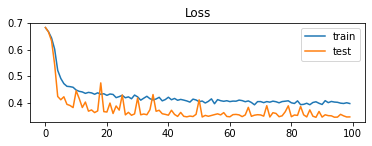

In [23]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

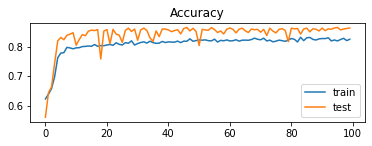

In [24]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
## Saving the model
model.save("covid_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: covid_model\assets


In [26]:
## Predicting on testing dataset
pred = model.predict(x_test)

In [27]:
## converting labels [1,0],[0,1] to 'yes' and 'no' respectively

preds = []
for pre in pred:
    if np.argmax(pre)==0:
        preds.append('yes')
    else: preds.append('no')

real = []
for re in y_test:
    if re[0][0]==0:
        real.append('no')
    else: real.append('yes')


In [28]:
## Getting accuracy manually

count=0
for i in range(len(preds)):
    if preds[i]==real[i]: count+=1
count/len(preds)

0.8626406157489639

In [29]:
## classification report
print(classification_report(real,preds))

              precision    recall  f1-score   support

          no       0.93      0.74      0.83       745
         yes       0.83      0.96      0.89       944

    accuracy                           0.86      1689
   macro avg       0.88      0.85      0.86      1689
weighted avg       0.87      0.86      0.86      1689



[[0.9565678  0.0434322 ]
 [0.25637584 0.74362416]]


C:\Users\Alpha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['yes', 'no'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\Alpha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\Alpha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


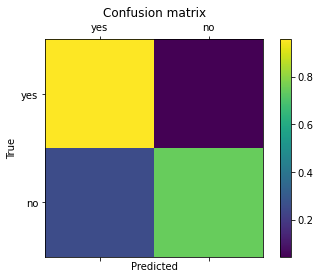

In [30]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ['yes', 'no']
cm = confusion_matrix(real, preds, labels, normalize='true')
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
